# ESTUDIO DE INVESTIGACIÓN SOBRE UNA BASE DE DATOS DE CANCER DE MAMA CSV 2

## 1.PROCEDENCIA  Y INFORMACIÓN DE LOS DATOS

En esta investigación trabajaremos con un CSV que contienen información sobre pacientes con cancer de mama. El CSV se han obtenido de los siguientes links.

https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data

Ahora explicaremos que información hay en el csv.

**id**: Identificador único para cada muestra.

**diagnosis**: Variable objetivo. "M" indica maligno y "B" indica benigno.

**radius_mean**: Promedio de las distancias desde el centro hasta los puntos del perímetro del tumor.

**texture_mean**: Desviación estándar de los valores de la escala de grises en la imagen.

**perimeter_mean**: Perímetro promedio del contorno del tumor.

**area_mean**: Área promedio dentro del contorno del tumor.

**smoothness_mean**: Variación local en las longitudes de los radios.


**compactness_mean**: Perímetro^2 / Área - 1.0.

**concavity_mean**: Severidad de las porciones cóncavas del contorno del tumor.

**concave points_mean**: Número de porciones cóncavas del contorno del tumor.

**symmetry_mean**: Simetría del tumor.

**fractal_dimension_mean**: Dimensión fractal "coastline approximation" - 1.


## 2 OBJETIVOS

**Utilización del Clustering**:
    
Exploración de Patrones:

Utiliza técnicas de clustering (por ejemplo, k-means) para explorar patrones en las características numéricas. Esto puede ayudarte a identificar subgrupos de tumores con características similares.

Validación Visual:

Visualiza los clusters obtenidos en gráficos de dispersión o mediante reducción de dimensionalidad (PCA) para observar si existen agrupaciones naturales en los datos.

Relación con la Variable "Diagnosis":

Compara los clusters obtenidos con la variable "diagnosis" para ver si hay alguna relación entre los grupos identificados y la malignidad o benignidad de los tumores.

**Utilización de Regresiones Lineales**:

Predicción de la Malignidad:

Utiliza regresiones logísticas para predecir la probabilidad de malignidad en función de las características numéricas. La variable objetivo sería "diagnosis" (maligno o benigno).

Identificación de Variables Relevantes:

Examina los coeficientes de la regresión logística para identificar qué características tienen una mayor influencia en la predicción de malignidad.

Evaluación del Modelo:

Evalúa el rendimiento del modelo de regresión logística utilizando métricas como la precisión, sensibilidad, especificidad, entre otras.

**Análisis de Correlación**:

Matriz de Correlación:

Calcula la matriz de correlación entre las variables numéricas. Esto te dará una idea de las relaciones lineales entre las características.

Visualización de Correlaciones:

Utiliza gráficos como mapas de calor para visualizar las correlaciones entre las variables. Esto puede ayudarte a identificar patrones y relaciones entre las características.

Selección de Características:

Si hay fuertes correlaciones entre algunas variables, podrías considerar la posibilidad de seleccionar un conjunto más pequeño de características para simplificar el modelo.

## 3PROGRAMA

### 3.1 IMPORTACIONES NECESARIAS PARA TRABAJAR

In [2]:
import pandas as pd #Pandas es una biblioteca de manipulación y análisis de datos en Python.
import matplotlib.pyplot as plt#para crear gráficos y visualizaciones
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


### 3.2 BASE DE DATOS

#### 3.2.1 IMPORTACIÓN DE LOS DATOS

In [3]:
col_names = ["diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
#Como el id nos da igual no lo traeremos.
# load dataset
DATABASE1= pd.read_csv("breast-cancer2.csv", header=0, names=col_names)
DATABASE1.info()
DATABASE1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
...            ...          ...           ...             ...        ...   
926424           M        21.56         22.39          142.00     1479.0   
926682           M        20.13         28.25          131.20     1261.0   
926954           M        16.60         28.08          108.30      858.1   
927241           M        20.60         29.33          140.10     1265.0   
92751            B         7.76         24.54           47.92      181.0   

          smoothness_mean  compactness_mean  concavity_mean  \
842302            0.11840           0.27760         0.30010   
842517            0.08474           0.07864         0.08690   
84300903          0.10960           0.15990         0.19740   
84348301          0.14250           0.28390         0.24140   
84358402          0.10030           0.13280         0.19800   
...                   ...               ...             ...   
926424            0.11100           0.11590         0.24390   
926682            0.09780           0.10340         0.14400   
926954            0.08455           0.10230         0.09251   
927241            0.11780           0.27700         0.35140   
92751             0.05263           0.04362         0.00000   

          concave points_mean  symmetry_mean  ...  radius_worst  \
842302                0.14710         0.2419  ...        25.380   
842517                0.07017         0.1812  ...        24.990   
84300903              0.12790         0.2069  ...        23.570   
84348301              0.10520         0.2597  ...        14.910   
84358402              0.10430         0.1809  ...        22.540   
...                       ...            ...  ...           ...   
926424                0.13890         0.1726  ...        25.450   
926682                0.09791         0.1752  ...        23.690   
926954                0.05302         0.1590  ...        18.980   
927241                0.15200         0.2397  ...        25.740   
92751                 0.00000         0.1587  ...         9.456   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
842302            17.33           184.60      2019.0           0.16220   
842517            23.41           158.80      1956.0           0.12380   
84300903          25.53           152.50      1709.0           0.14440   
84348301          26.50            98.87       567.7           0.20980   
84358402          16.67           152.20      1575.0           0.13740   
...                 ...              ...         ...               ...   
926424            26.40           166.10      2027.0           0.14100   
926682            38.25           155.00      1731.0           0.11660   
926954            34.12           126.70      1124.0           0.11390   
927241            39.42           184.60      1821.0           0.16500   
92751             30.37            59.16       268.6           0.08996   

          compactness_worst  concavity_worst  concave points_worst  \
842302              0.66560           0.7119                0.2654   
842517              0.18660           0.2416                0.1860   
84300903            0.42450           0.4504                0.2430   
84348301            0.86630           0.6869                0.2575   
84358402            0.20500           0.4000                0.1625   
...                     ...              ...                   ...   
926424              0.21130           0.4107                0.2216   
926682              0.19220           0.3215                0.1628   
926954         

Hay 569 pacientes todos los campos son numericos menos el de Maligno o Benigno. Encima el unico de numero entero es el id que identifia al paciente.

Interesara en vez de tener M y B tener como numero para ver como se distribuye.

In [4]:
mapping = {'M': 0, 'B': 1}  # Asigna un valor numérico a cada categoría
DATABASE1['diagnosis'] = DATABASE1['diagnosis'].map(mapping)

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(DATABASE1.describe())

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.627417    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      1.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

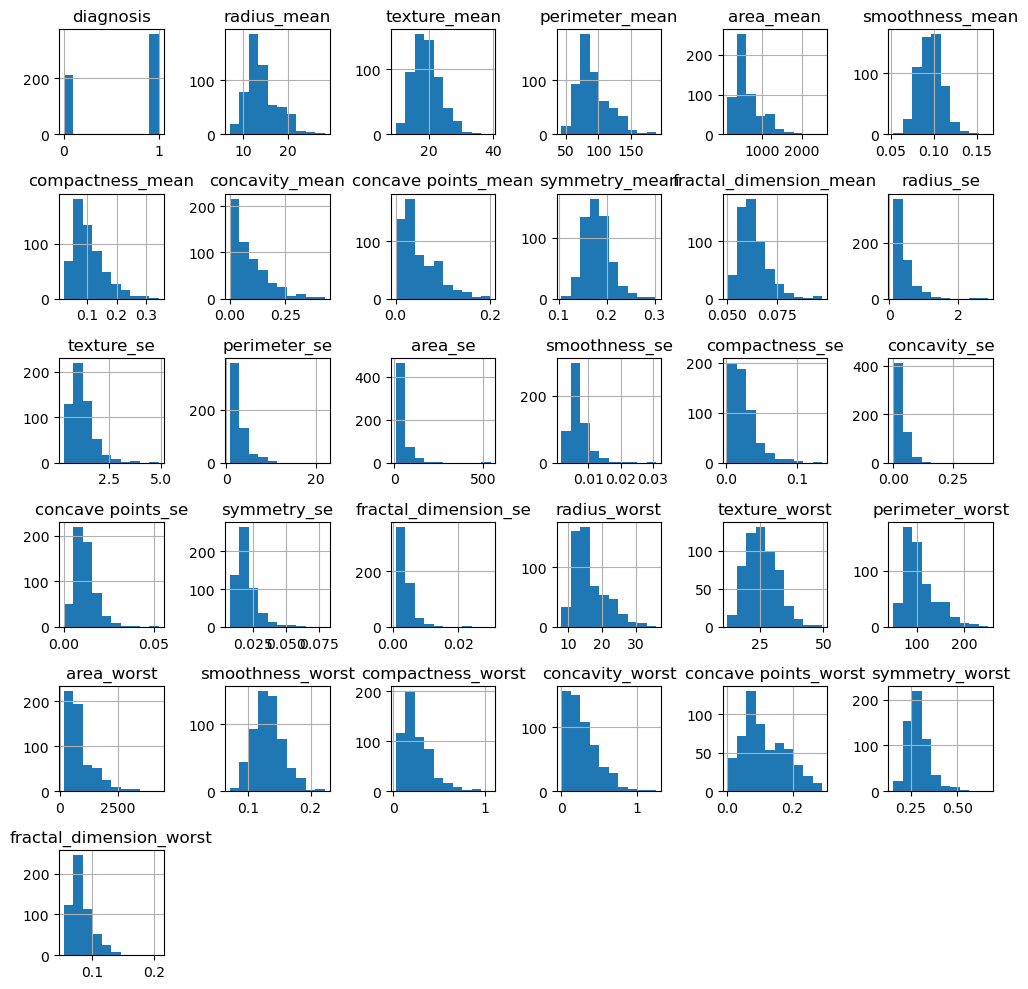

In [6]:
DATABASE1.hist(bins=10, figsize=(10, 10))
plt.tight_layout()
plt.show()


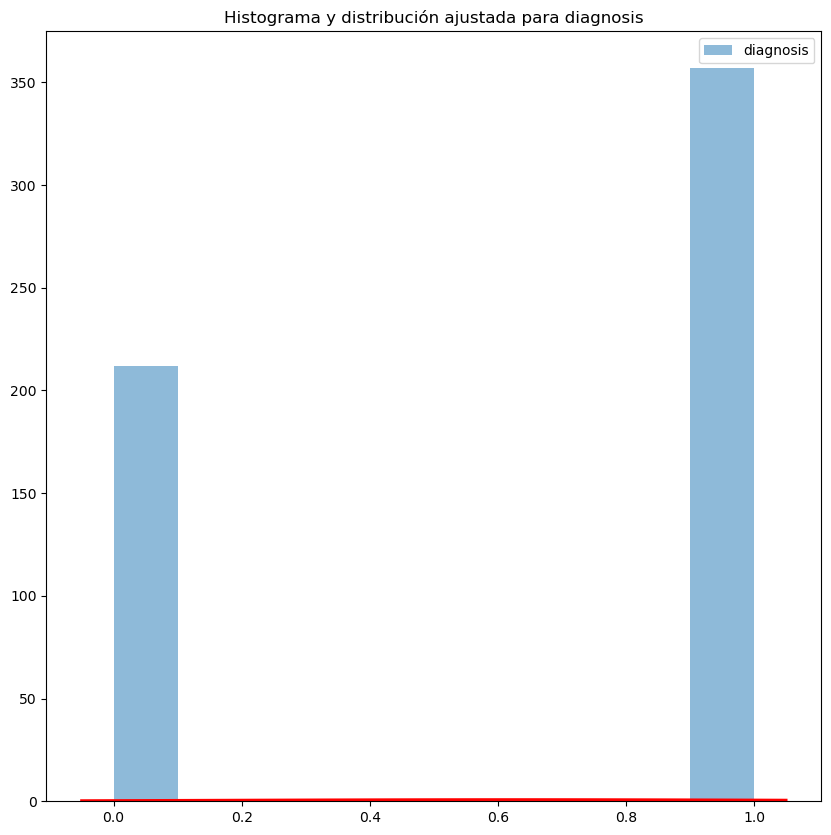

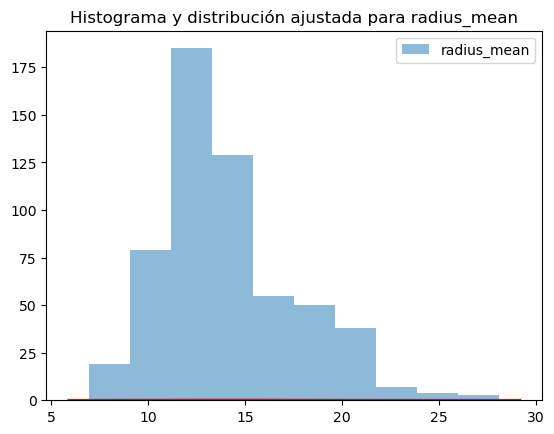

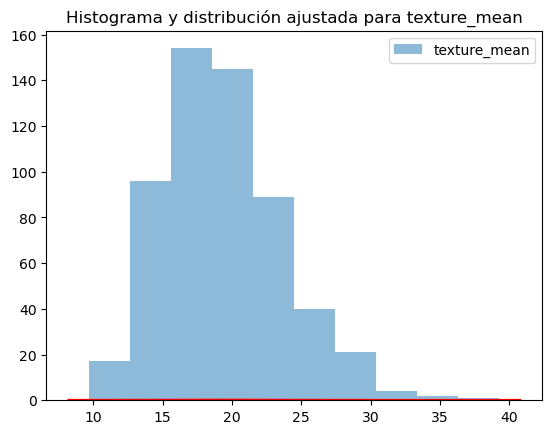

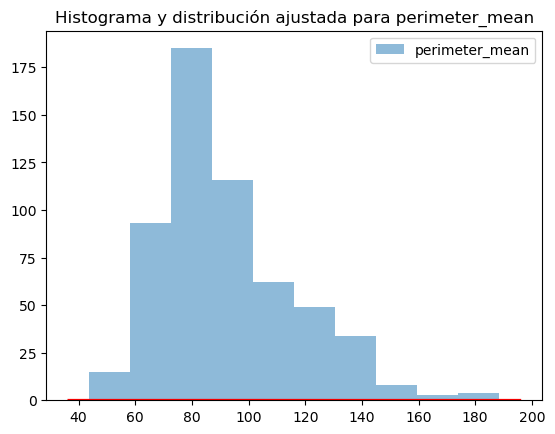

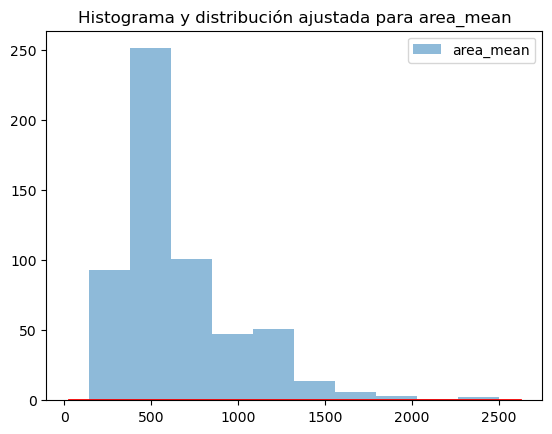

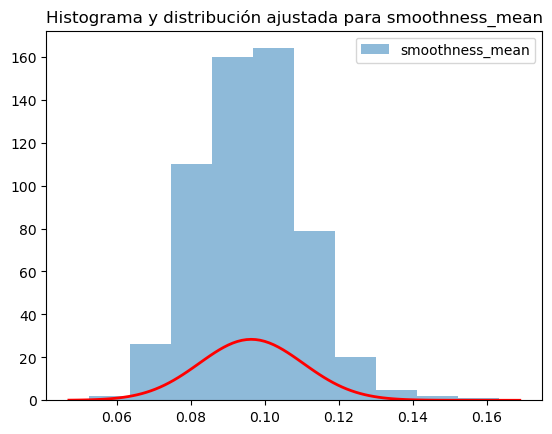

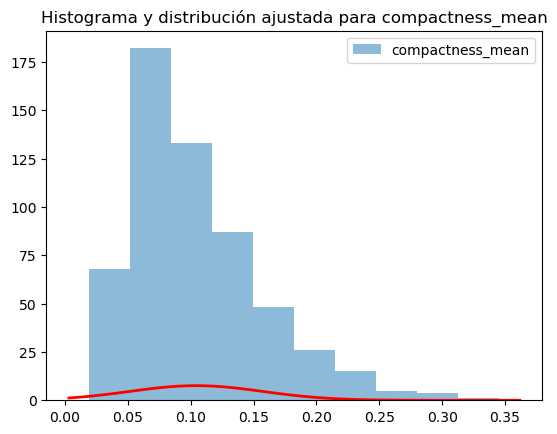

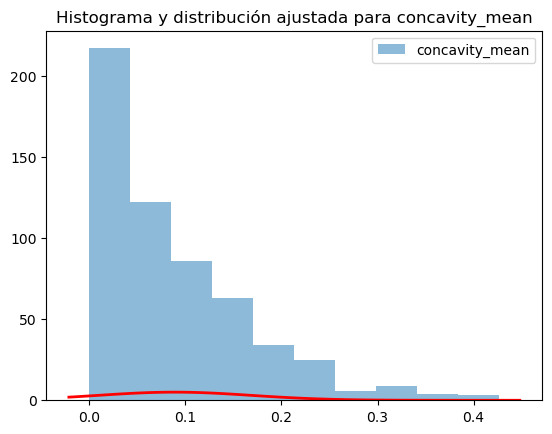

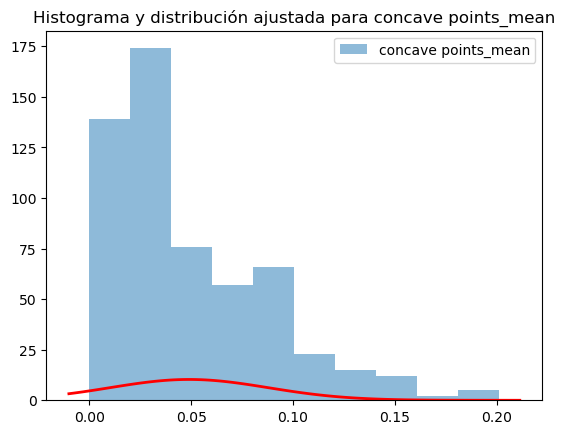

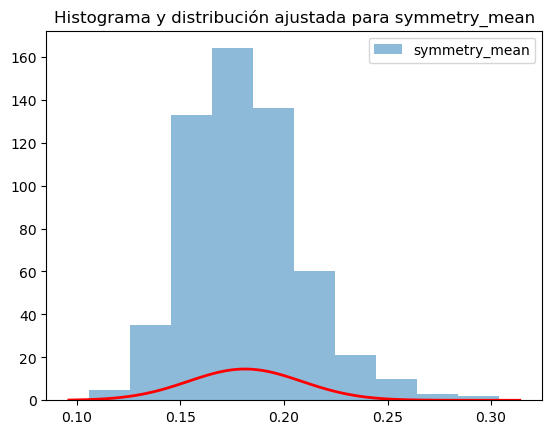

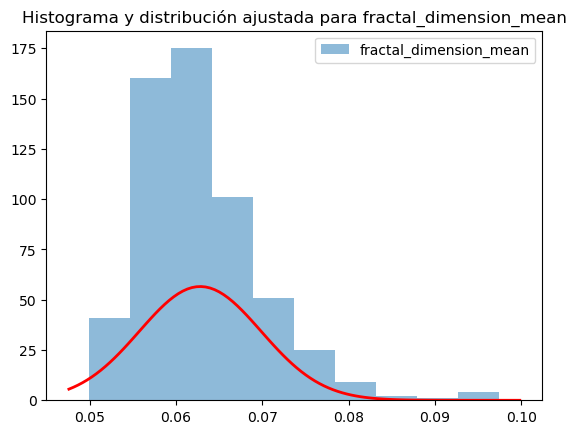

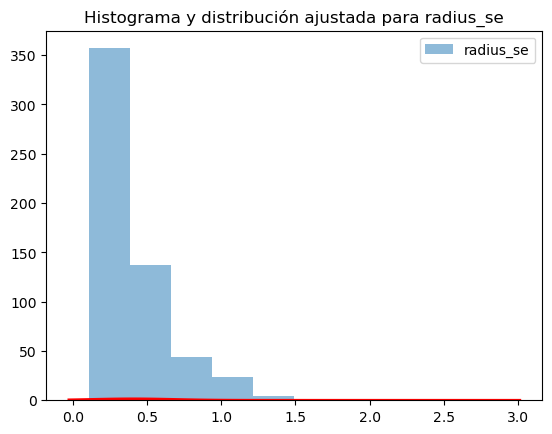

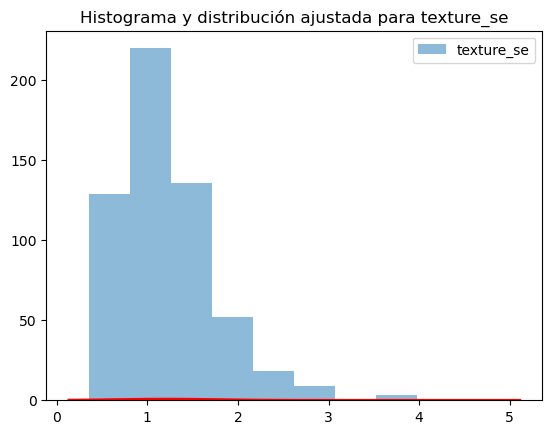

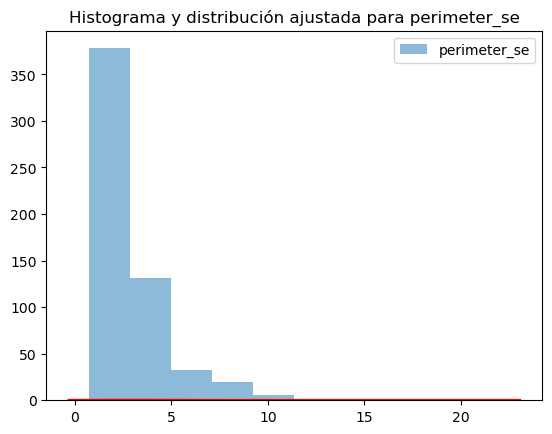

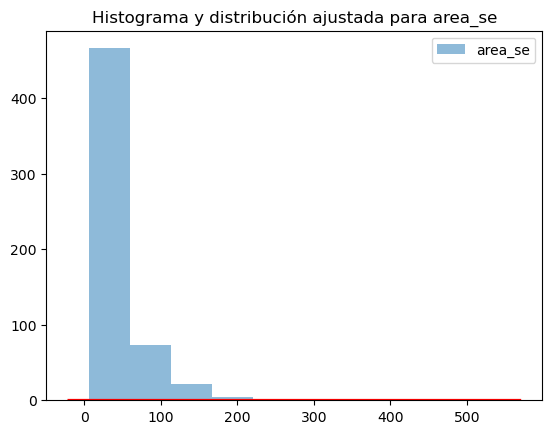

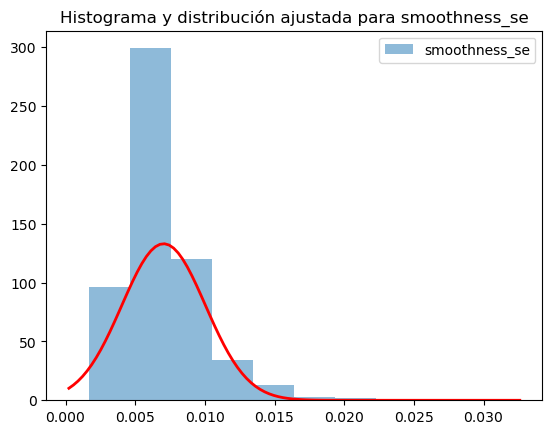

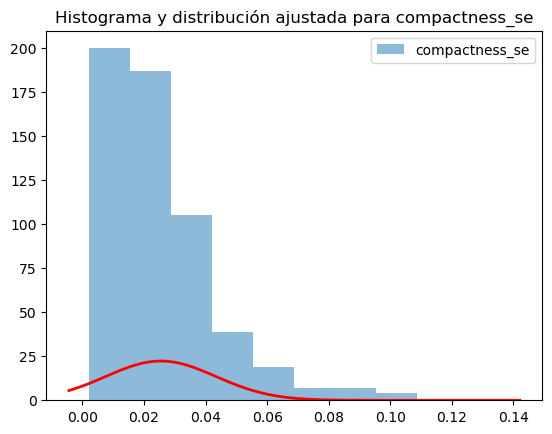

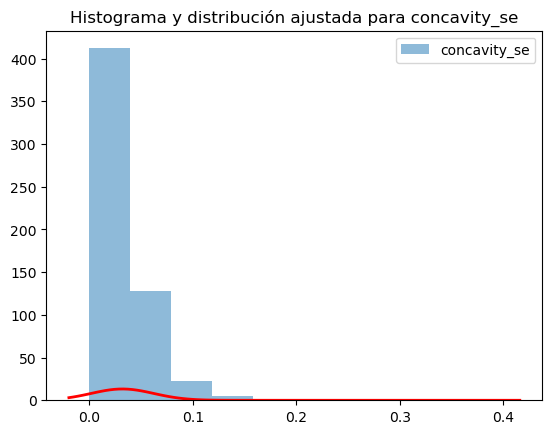

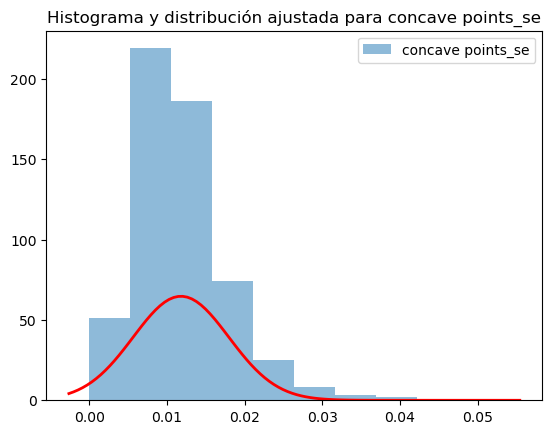

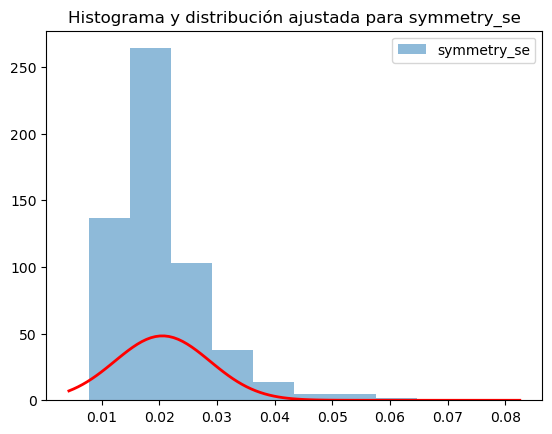

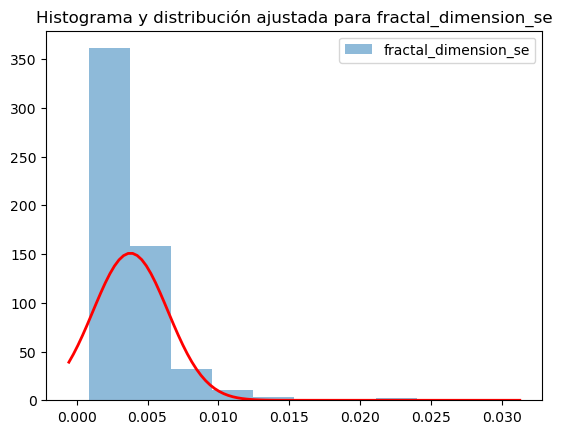

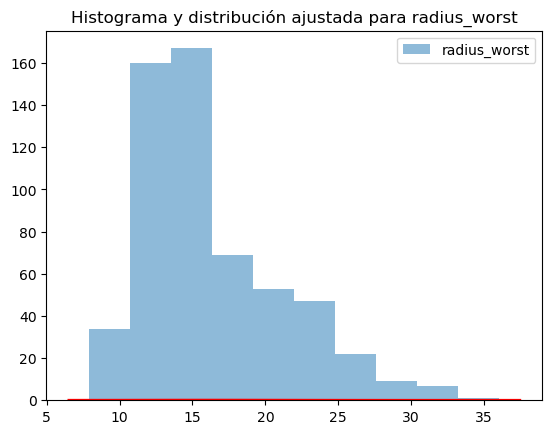

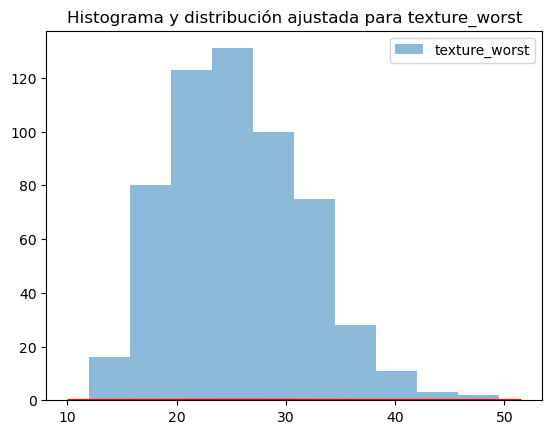

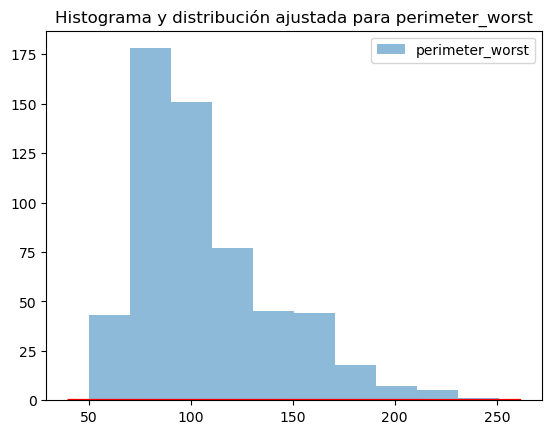

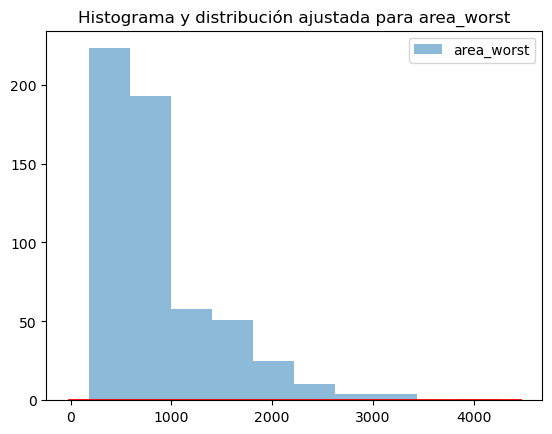

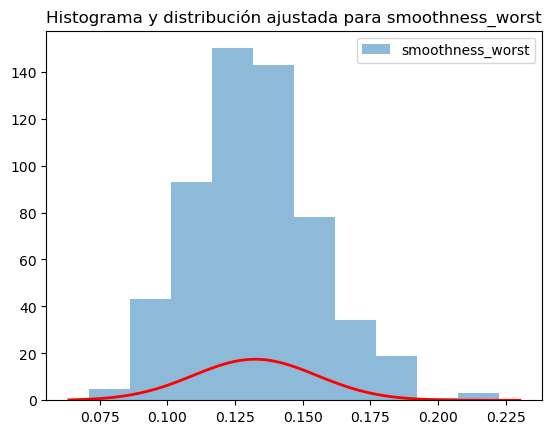

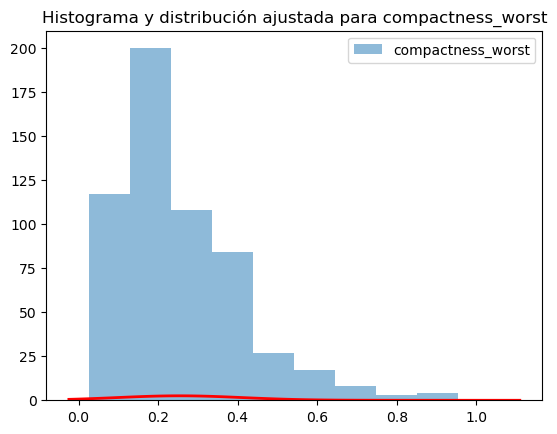

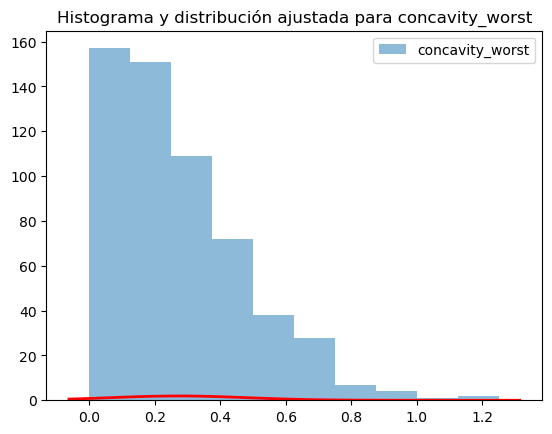

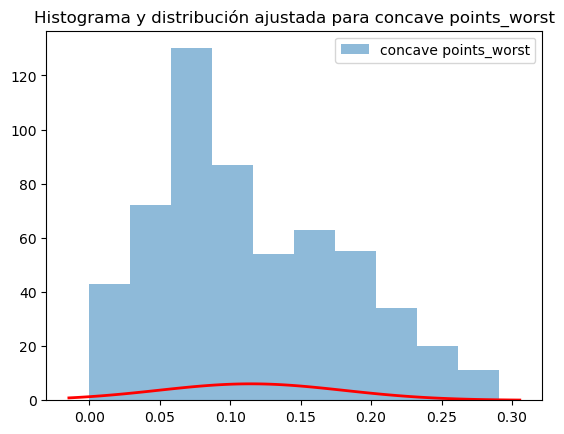

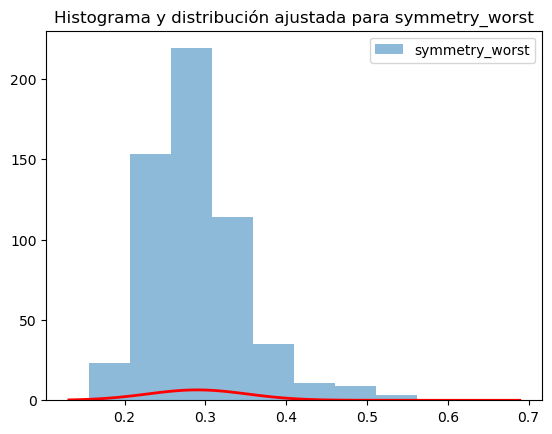

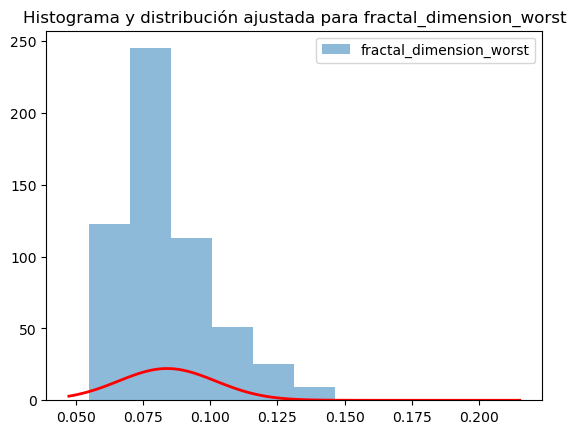

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
# Crear histogramas y ajustar distribuciones
plt.figure(figsize=(10, 10))
for column in DATABASE1.columns:
    plt.hist(DATABASE1[column], bins=10, alpha=0.5, label=column)
    # Ajustar una distribución a los datos
    dist = getattr(stats, 'norm')  # Distribución normal por defecto
    param = dist.fit(DATABASE1[column])
    # Dibujar la distribución ajustada
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    pdf = dist.pdf(x, *param)
    plt.plot(x, pdf, 'r-', linewidth=2)
    plt.title(f'Histograma y distribución ajustada para {column}')
    plt.legend()
    plt.show()


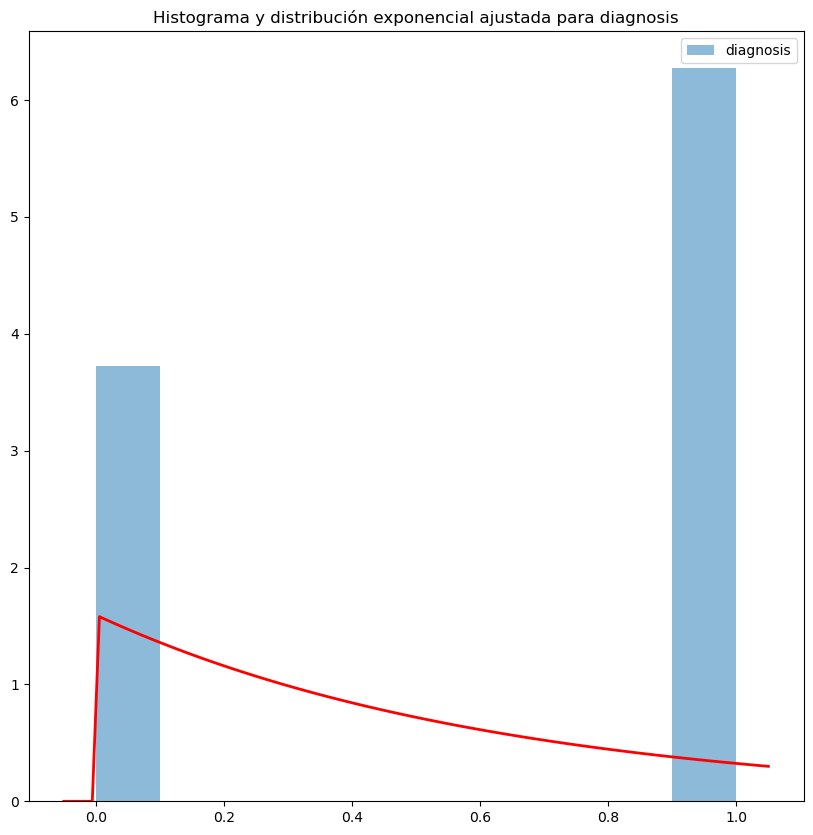

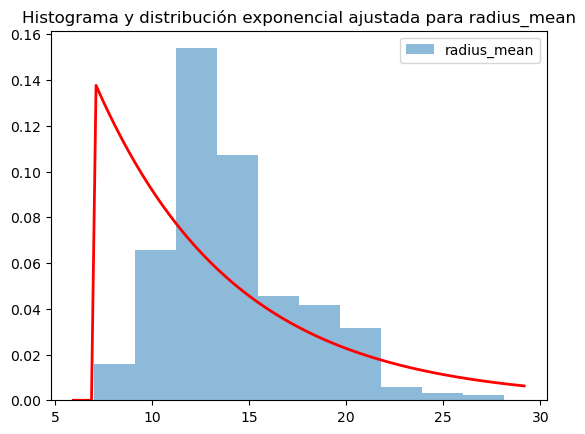

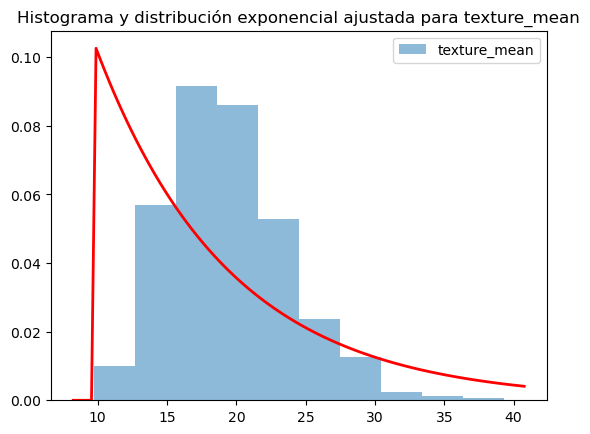

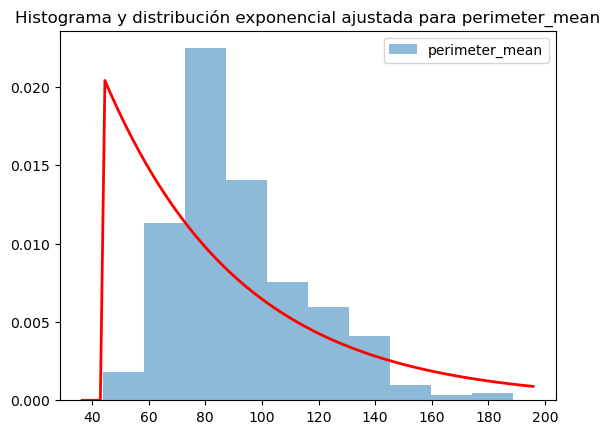

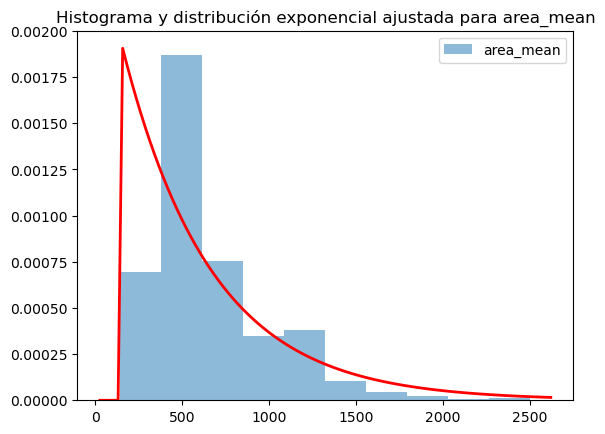

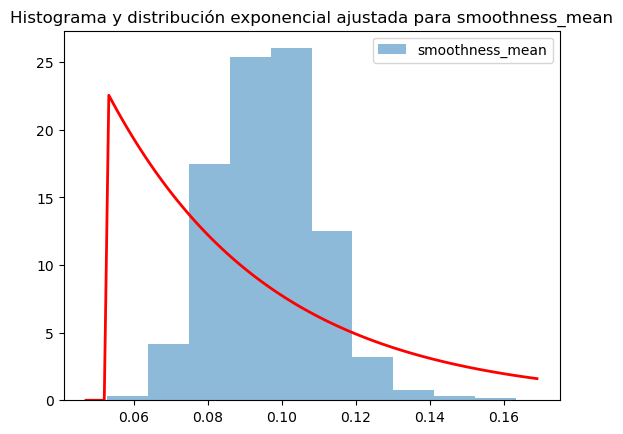

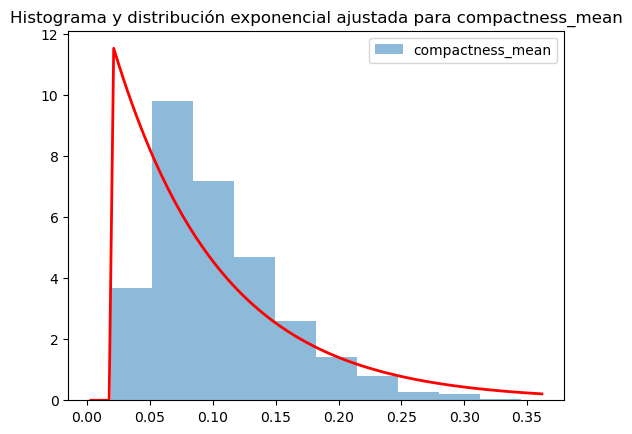

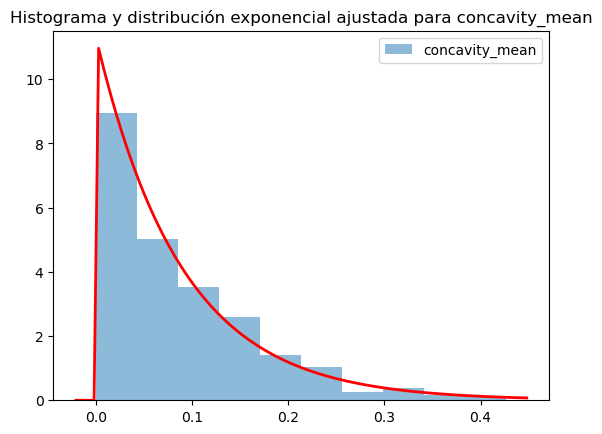

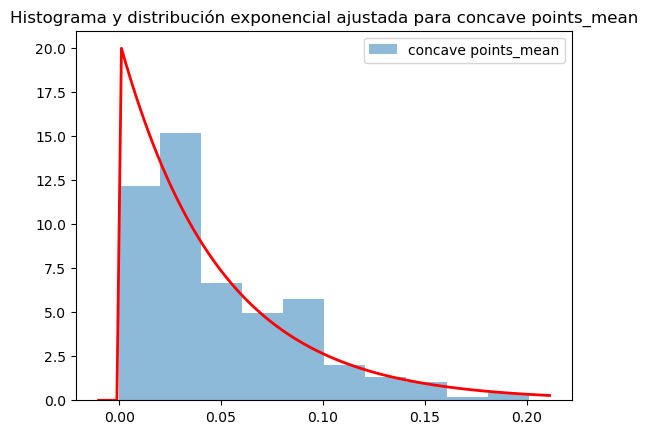

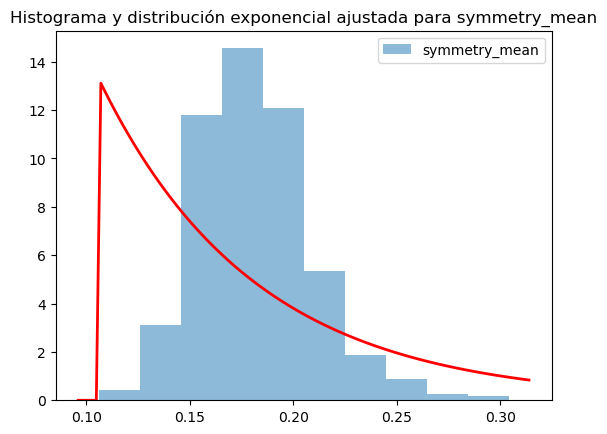

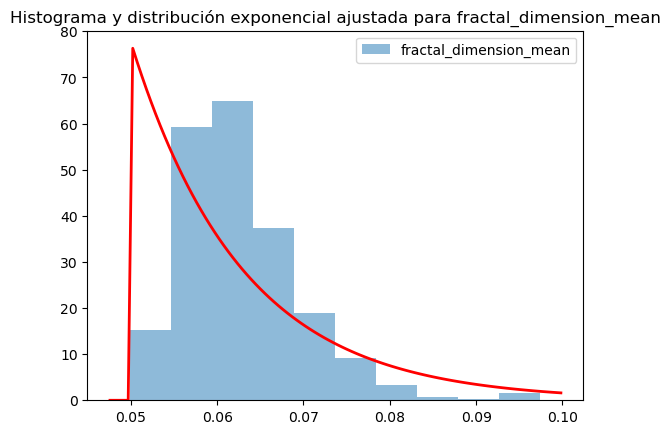

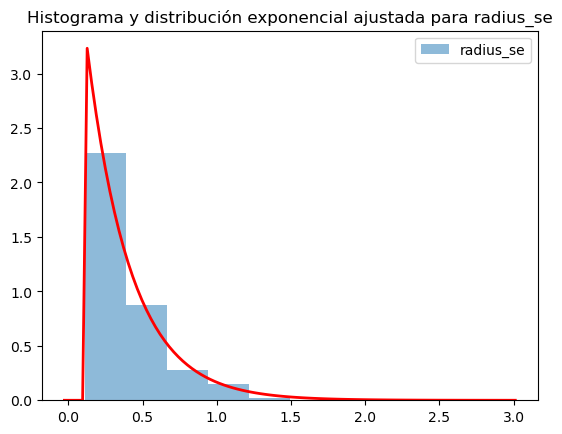

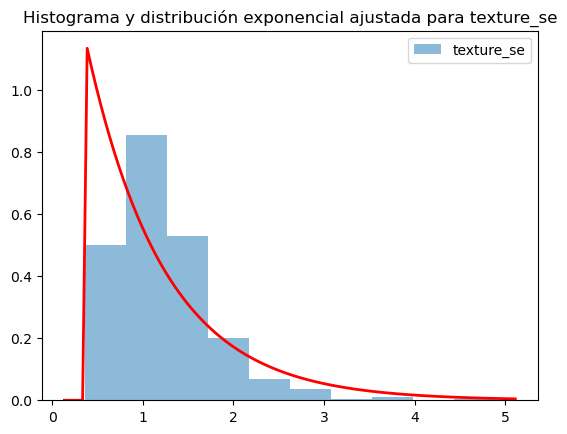

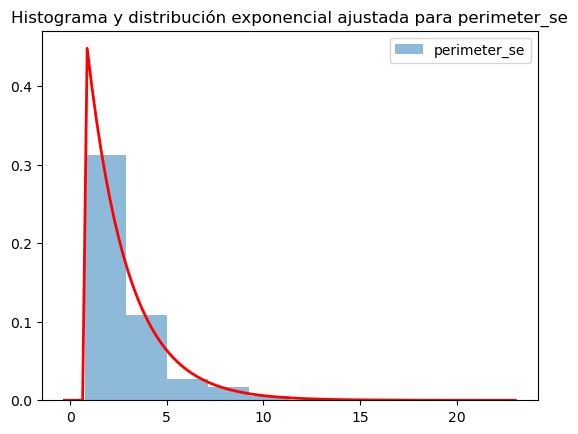

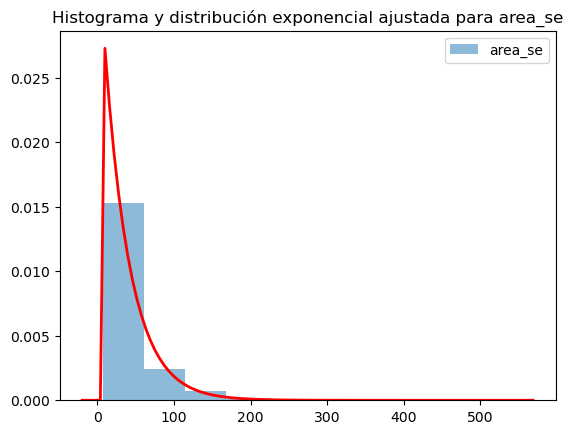

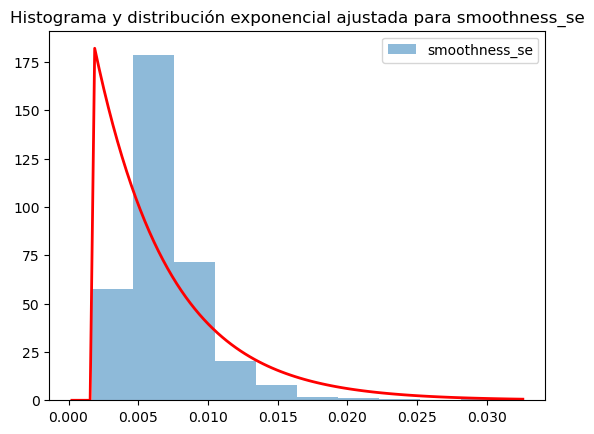

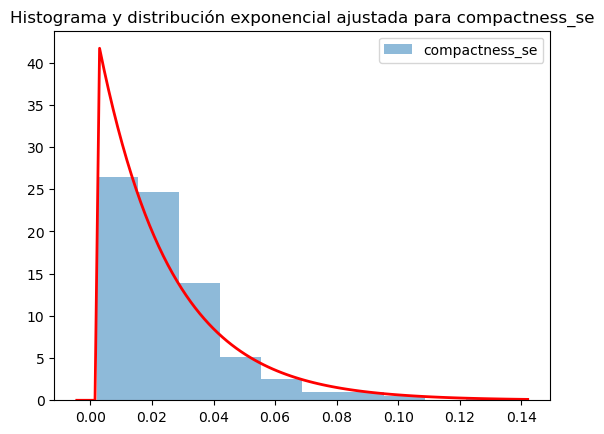

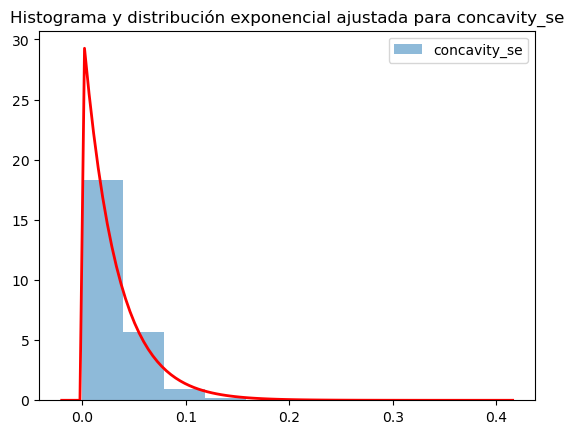

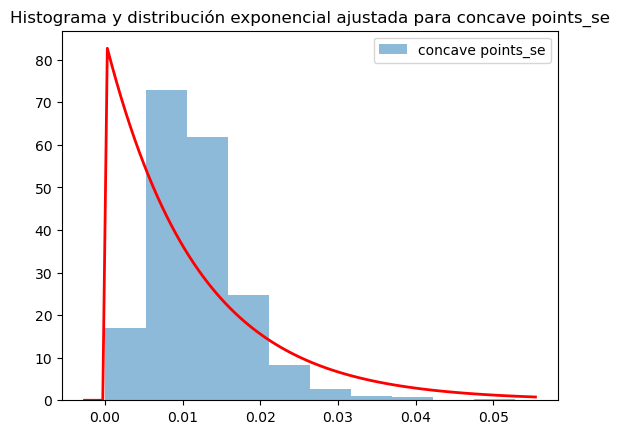

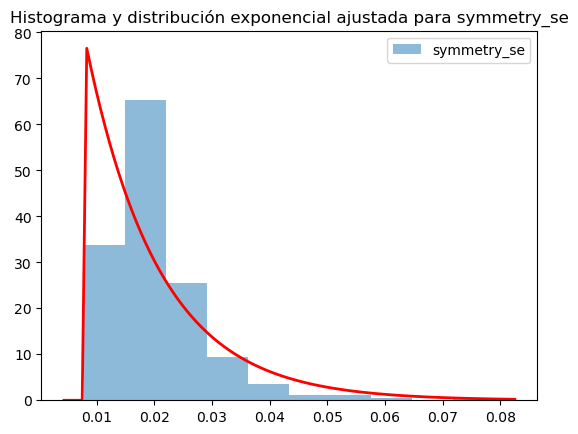

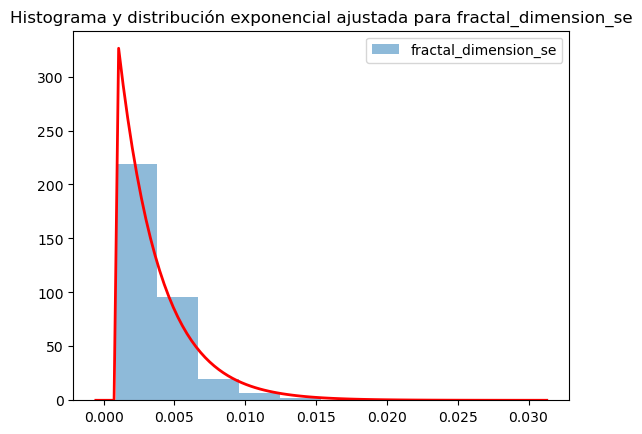

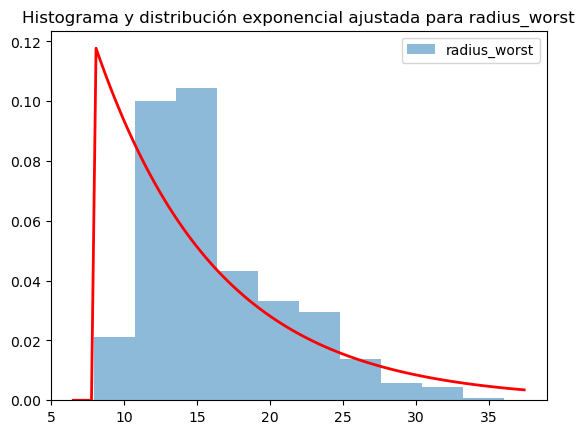

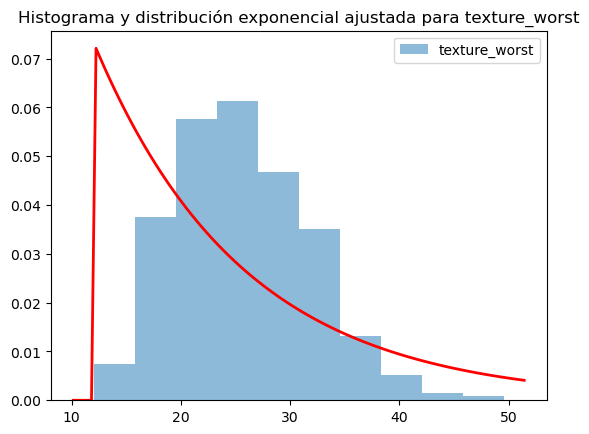

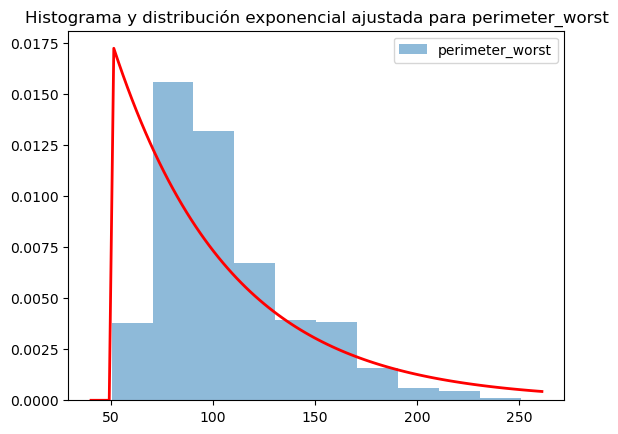

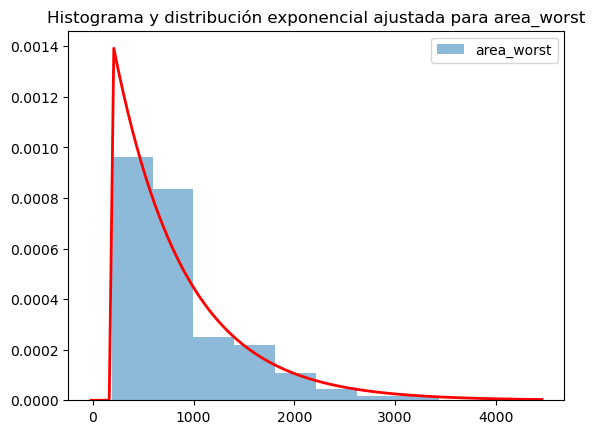

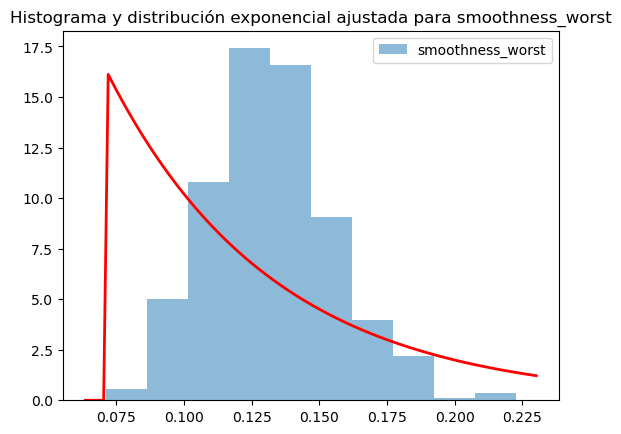

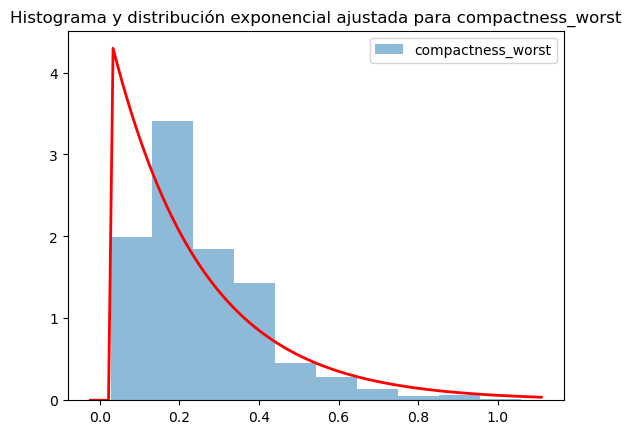

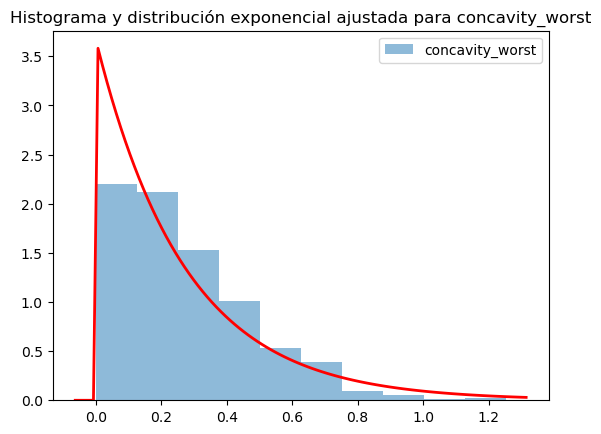

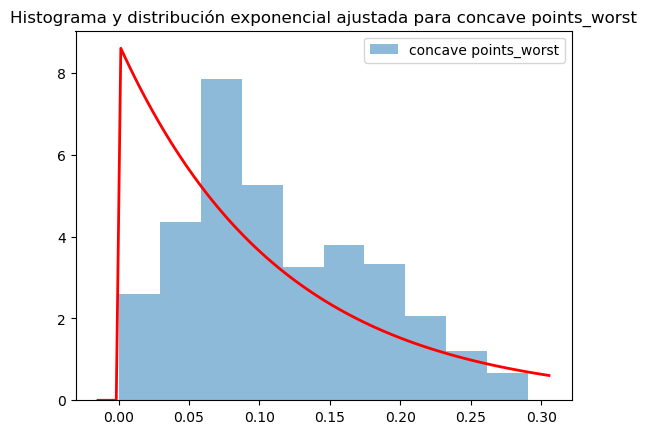

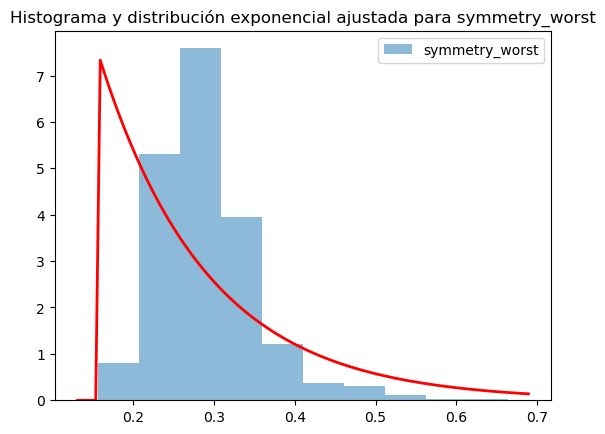

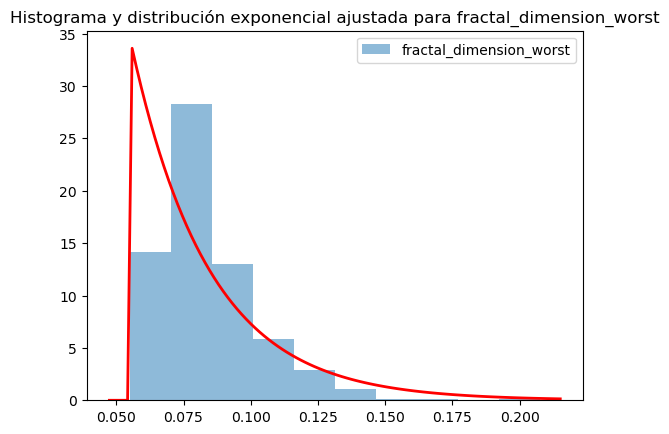

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Crear histogramas y ajustar distribuciones exponenciales
plt.figure(figsize=(10, 10))
for column in DATABASE1.columns:
    plt.hist(DATABASE1[column], bins=10, density=True, alpha=0.5, label=column)
    # Ajustar una distribución exponencial a los datos
    dist = stats.expon
    param = dist.fit(DATABASE1[column])
    # Dibujar la distribución ajustada
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    pdf = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    plt.plot(x, pdf, 'r-', linewidth=2)
    plt.title(f'Histograma y distribución exponencial ajustada para {column}')
    plt.legend()
    plt.show()


Se puede hacer boxplot para ver outliers.

#### 3.2 2 OUTLIERS

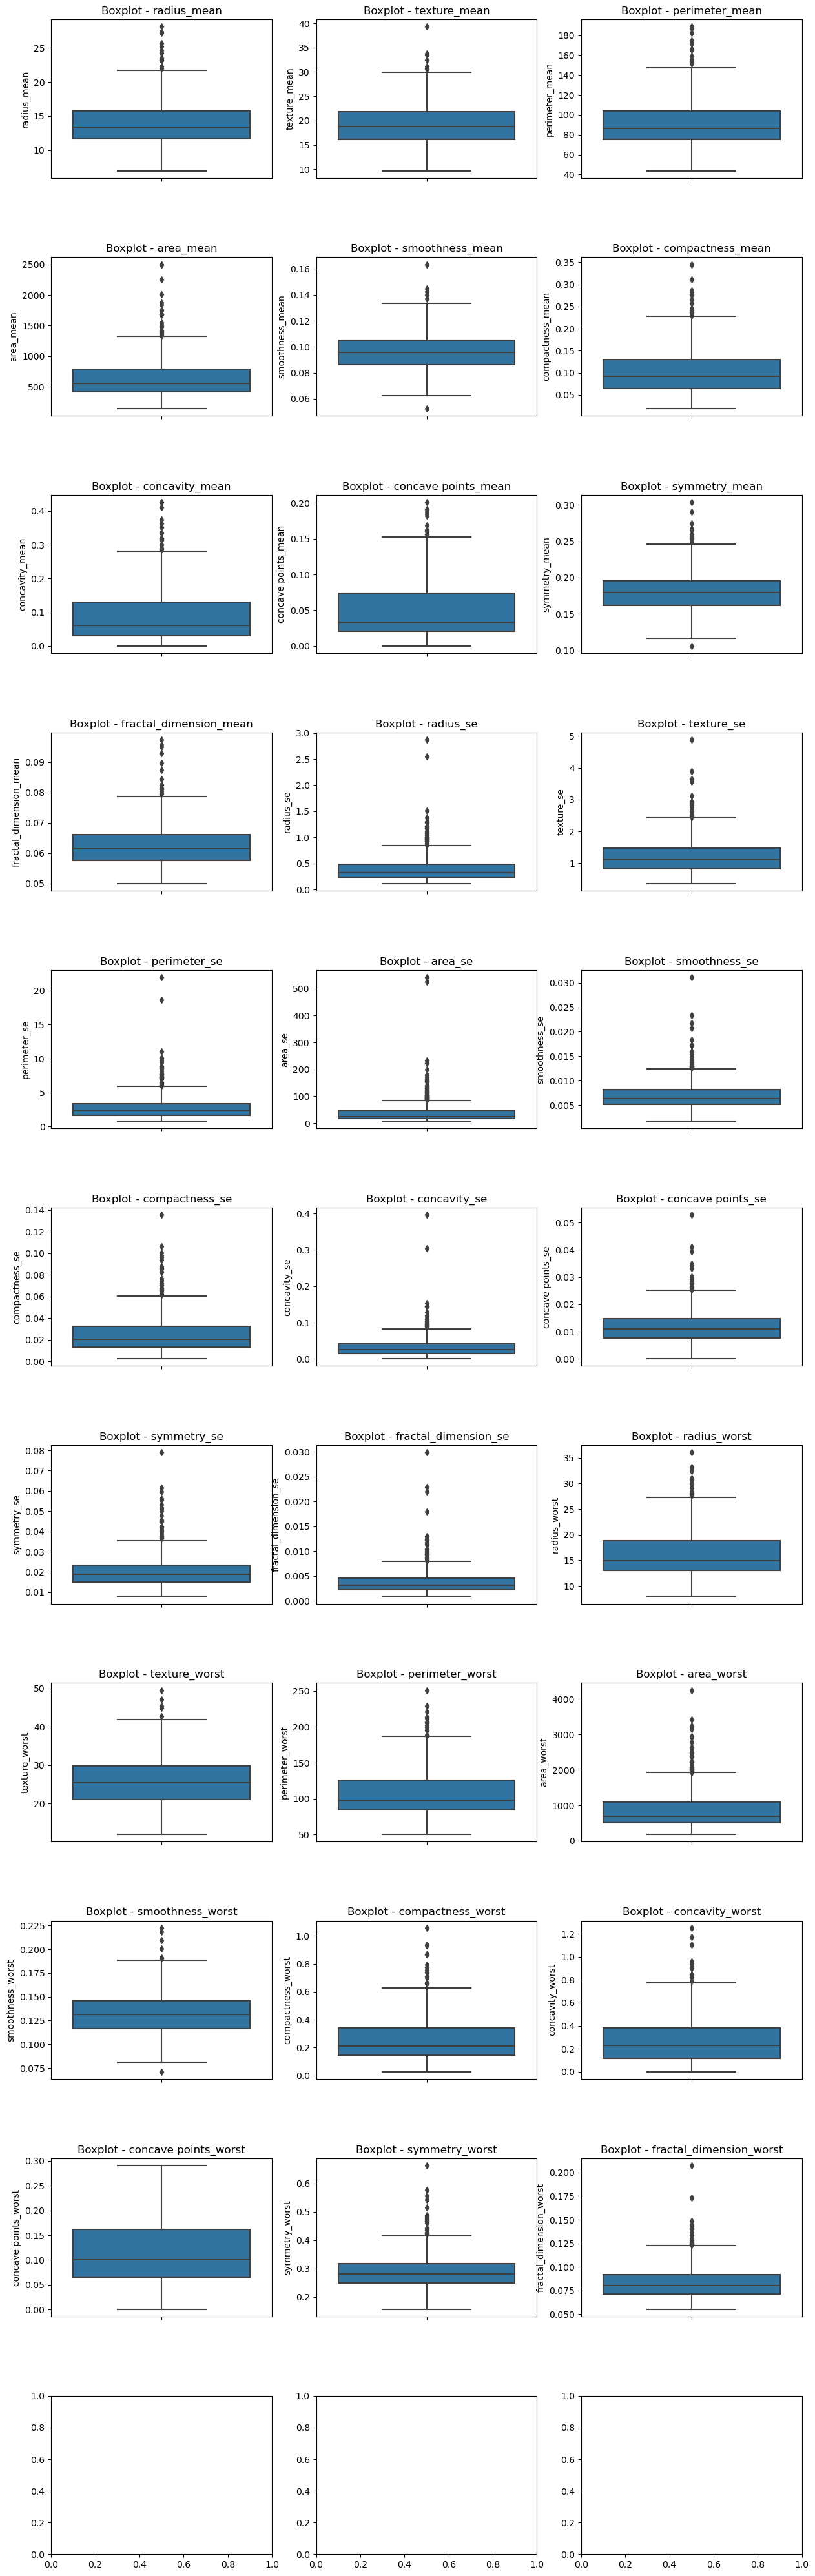

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir la lista de variables
col_names2 = ["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]

# Configurar subgráficos
fig, axes = plt.subplots(nrows=len(col_names2)//3 + 1, ncols=3, figsize=(15, 5*len(col_names2)//3 + 1))
fig.subplots_adjust(hspace=0.5)

# Crear boxplots individuales para cada variable usando un bucle
for idx, variable in enumerate(col_names2):
    row = idx // 3
    col = idx % 3
    sns.boxplot(y=DATABASE1[variable], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot - {variable}')

# Guardar la imagen
plt.savefig('boxplots.png')

# Mostrar la imagen
plt.show()


In [10]:
col_names2 = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]

for variable in col_names2:
    Q1 = DATABASE1[variable].quantile(0.1)
    Q3 = DATABASE1[variable].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = DATABASE1[(DATABASE1[variable] < lower_bound) | (DATABASE1[variable] > upper_bound)]
    if not outliers.empty:
        print(f'Outliers for {variable}:')
        for index, row in outliers.iterrows():
            print(f'ID: {index}, Value: {row[variable]}')
        print()




Outliers for radius_se:
ID: 8810703, Value: 2.873
ID: 911296202, Value: 2.547

Outliers for texture_se:
ID: 875099, Value: 4.885

Outliers for perimeter_se:
ID: 8810703, Value: 21.98
ID: 911296202, Value: 18.65

Outliers for area_se:
ID: 8810703, Value: 525.6
ID: 911296202, Value: 542.2

Outliers for smoothness_se:
ID: 881094802, Value: 0.03113

Outliers for concavity_se:
ID: 859471, Value: 0.3038
ID: 8710441, Value: 0.396

Outliers for concave points_se:
ID: 8710441, Value: 0.05279

Outliers for symmetry_se:
ID: 8610862, Value: 0.07895

Outliers for fractal_dimension_se:
ID: 859711, Value: 0.02193
ID: 8710441, Value: 0.02984
ID: 872608, Value: 0.01792
ID: 89143602, Value: 0.02286

Outliers for fractal_dimension_worst:
ID: 84501001, Value: 0.2075



In [11]:
DATABASE1['num_outliers'] = 0
for variable in col_names2:
    Q1 = DATABASE1[variable].quantile(0.1)
    Q3 = DATABASE1[variable].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_mask = (DATABASE1[variable] < lower_bound) | (DATABASE1[variable] > upper_bound)
    DATABASE1['num_outliers'] += outliers_mask.astype(int)
# Mostrar pacientes con más de un outlier
patient_with_most_outliers = DATABASE1.sort_values(by='num_outliers', ascending=False).iloc[0]

print(f'Paciente con más outliers:\n{patient_with_most_outliers}')

Paciente con más outliers:
diagnosis                    1.00000
radius_mean                  9.73100
texture_mean                15.34000
perimeter_mean              63.78000
area_mean                  300.20000
smoothness_mean              0.10720
compactness_mean             0.15990
concavity_mean               0.41080
concave points_mean          0.07857
symmetry_mean                0.25480
fractal_dimension_mean       0.09296
radius_se                    0.82450
texture_se                   2.66400
perimeter_se                 4.07300
area_se                     49.85000
smoothness_se                0.01097
compactness_se               0.09586
concavity_se                 0.39600
concave points_se            0.05279
symmetry_se                  0.03546
fractal_dimension_se         0.02984
radius_worst                11.02000
texture_worst               19.49000
perimeter_worst             71.04000
area_worst                 380.50000
smoothness_worst             0.12920
compactness

In [12]:
#indices_a_eliminar = [8810703, 911296202, 8710441]

# Eliminar las filas correspondientes a los índices especificados
#DATABASE1 = DATABASE1.drop(indices_a_eliminar)

# Verificar que los pacientes hayan sido eliminados
DATABASE1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

VALORAR SI ESTE PACIENTE DEBERIA DE QUITARSE

TODO DEPENDE DE LOS PORCENTILES QUE SE ELIGAN

### 3.3 CLUSTERING

Identificación de Subtipos de Tumores:

Aplicar técnicas de clustering a las características como radius_mean, texture_mean, etc., podría ayudar a identificar subtipos de tumores con perfiles similares. Por ejemplo, podrías descubrir grupos de tumores que comparten características específicas, lo que podría indicar diferentes subtipos de cáncer de mama.

Segmentación para Análisis Detallado:

Al aplicar clustering, podrías segmentar los tumores en grupos más homogéneos. Luego, podrías realizar análisis más detallados en cada grupo para entender las características específicas que los distinguen. Esto podría ser útil en la investigación clínica y en la toma de decisiones de tratamiento.

Detección de Outliers:

Utilizar clustering para identificar posibles outliers o casos atípicos en las características de los tumores. Estos casos podrían ser de interés para un análisis más profundo o podrían indicar casos clínicos especiales que requieren atención particular.

Visualización de Datos:

Aplicar técnicas de reducción de dimensionalidad como PCA antes del clustering y visualizar los resultados. Esto te permitiría ver cómo las muestras se agrupan en un espacio bidimensional y proporcionar una representación gráfica de la estructura de los datos.

Asociación con la Variable Objetivo:

Después de realizar el clustering, puedes analizar cómo los grupos identificados se relacionan con la variable objetivo (diagnosis en este caso). Esto podría revelar si ciertos subtipos de tumores identificados por el clustering están asociados con malignidad o benignidad.

**Número Óptimo de Clusters**:

Puedes explorar técnicas como el "codo" o la "silueta" para determinar el número óptimo de clusters.

**Interpretación de Características**:

Analiza las características de cada cluster (por ejemplo, utilizando estadísticas descriptivas) para entender las propiedades distintivas de cada grupo.

**Validación del Clustering**:

Evalúa la calidad del clustering mediante métricas específicas o validación externa, si tienes etiquetas de clase conocidas.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se      

C:\Users\asier\anaconda6\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


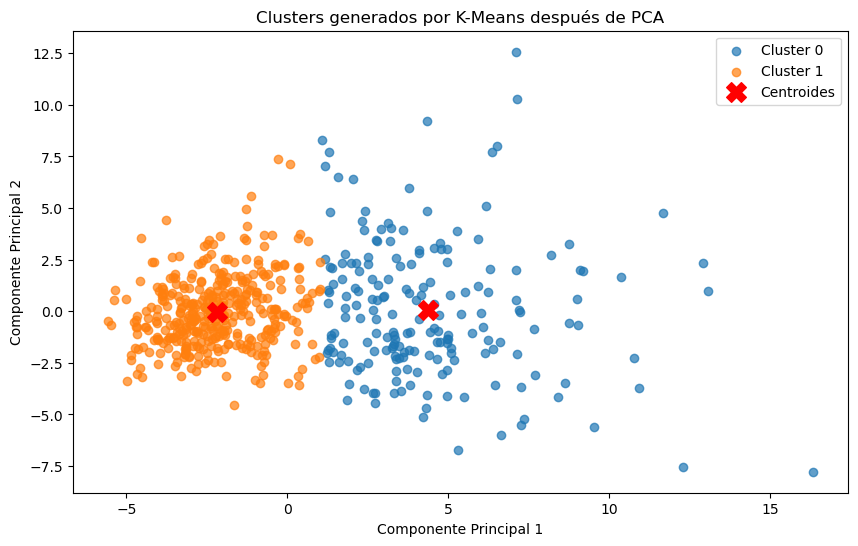

In [13]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Suponiendo que ya tienes tu BASEDEDATOS1
# Selecciona solo las columnas numéricas (puedes ajustar esto según tus datos)
numeric_columns = DATABASE1.select_dtypes(include=['float64']).columns
selected_data = DATABASE1[numeric_columns]

selected_data.info()
# Escala los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Aplica PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Aplica K-Means a los componentes principales
num_clusters = 2  # Puedes ajustar esto según tus necesidades
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(principal_components)

# Crea un DataFrame con los resultados
resultados_clustering = pd.DataFrame({
    'PC1': principal_components[:, 0],
    'PC2': principal_components[:, 1],
    'Cluster': labels,
    'diagnosis': DATABASE1['diagnosis']  # Asegura que 'diagnosis' se incluya en el DataFrame
})

# Visualización de los clusters en el espacio de los componentes principales
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = resultados_clustering[resultados_clustering['Cluster'] == cluster]
    plt.scatter(
        x=cluster_data['PC1'],
        y=cluster_data['PC2'],
        label=f'Cluster {cluster}',
        alpha=0.7
    )

# Visualizar los centroides de los clusters
plt.scatter(
    x=kmeans.cluster_centers_[:, 0],
    y=kmeans.cluster_centers_[:, 1],
    marker='X',
    s=200,
    color='red',
    label='Centroides'
)

plt.title('Clusters generados por K-Means después de PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()







C:\Users\asier\anaconda6\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\asier\anaconda6\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\asier\anaconda6\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\asier\anaconda6\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

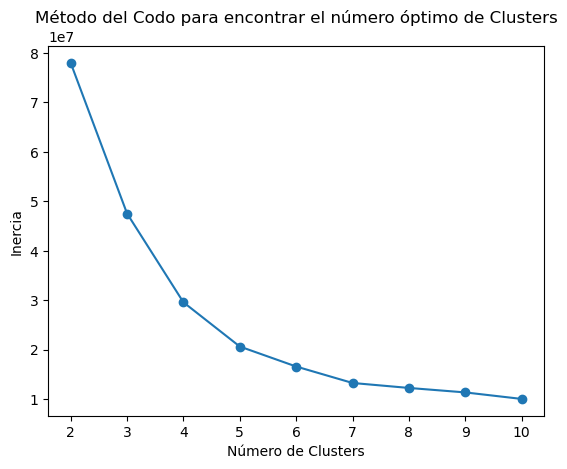

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcula la inercia para diferentes valores de k
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(DATABASE1)
    inertia.append(kmeans.inertia_)

# Grafica la inercia en función de k
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar el número óptimo de Clusters')
plt.show()


C:\Users\asier\anaconda6\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\asier\anaconda6\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\asier\anaconda6\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\asier\anaconda6\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

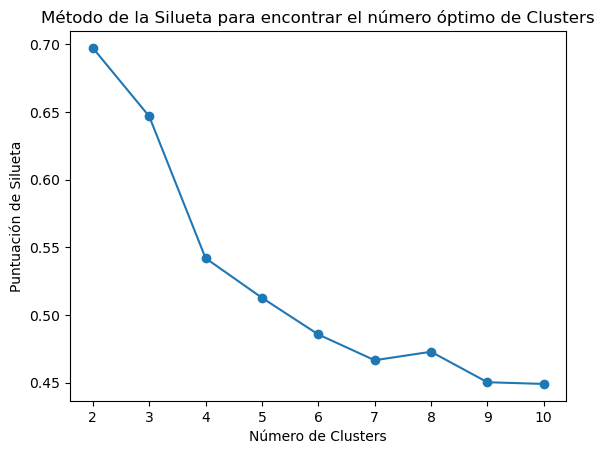

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(DATABASE1)
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(DATABASE1, cluster_labels))

# Grafica las puntuaciones de silueta en función de k
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta para encontrar el número óptimo de Clusters')
plt.show()



K=4 el correcto

In [16]:
# Agregar la información de cluster al conjunto de datos original
DATABASE1['Cluster'] = labels

# Estadísticas descriptivas para cada cluster
cluster_stats = DATABASE1.groupby('Cluster').describe()
print(cluster_stats)

        diagnosis                                              radius_mean  \
            count      mean       std  min  25%  50%  75%  max       count   
Cluster                                                                      
0           191.0  0.083770  0.277770  0.0  0.0  0.0  0.0  1.0       191.0   
1           378.0  0.902116  0.297551  0.0  1.0  1.0  1.0  1.0       378.0   

                                                                    \
              mean       std    min      25%    50%     75%    max   
Cluster                                                              
0        17.475288  3.548948  9.029  15.0700  17.57  19.795  28.11   
1        12.435579  1.953139  6.981  11.2625  12.36  13.640  18.81   

        texture_mean                                                      \
               count       mean       std    min      25%    50%     75%   
Cluster                                                                    
0              191.0  21.29853

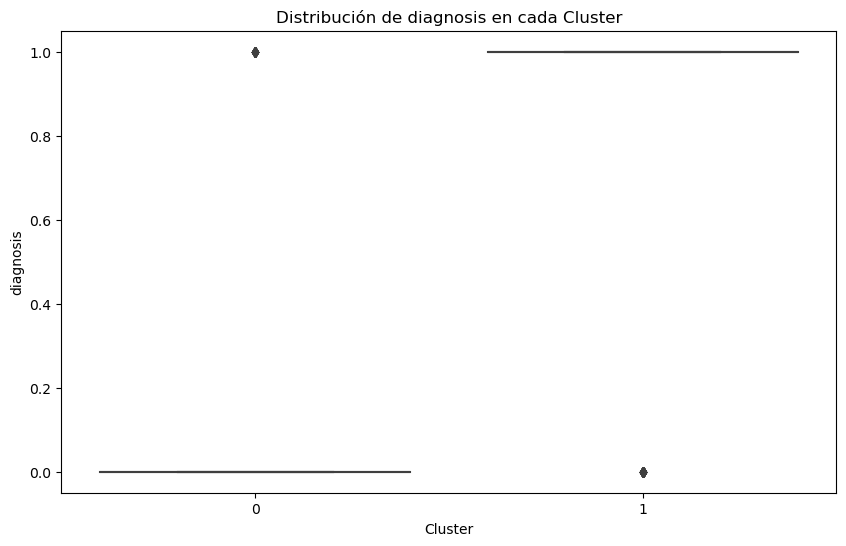

In [17]:
# Boxplot para una variable específica
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='diagnosis', data=DATABASE1)
plt.title('Distribución de diagnosis en cada Cluster')
plt.show()


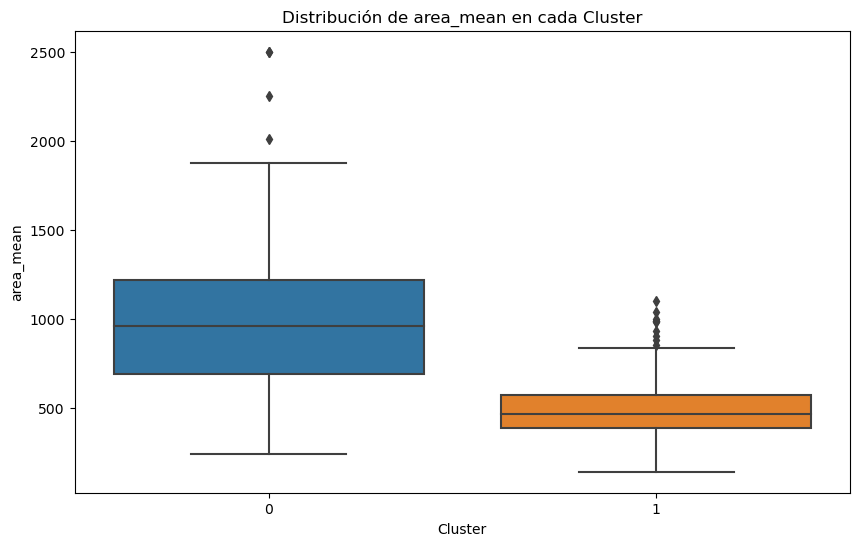

In [18]:
# Boxplot para una variable específica
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='area_mean', data=DATABASE1)
plt.title('Distribución de area_mean en cada Cluster')
plt.show()


In [19]:
# Obtener las cargas de las variables en los componentes principales
loadings = pca.components_

# Visualizar las variables más importantes para el primer componente principal
component1_loadings = loadings[0, :]
variables_importantes = selected_data.columns[np.abs(component1_loadings).argsort()[::-1]]
print("Variables más importantes para el primer componente principal:")
print(variables_importantes)
# Visualizar las variables más importantes para el segundo componente principal
component2_loadings = loadings[1, :]
variables_importantes_component2 = selected_data.columns[np.abs(component2_loadings).argsort()[::-1]]
print("Variables más importantes para el segundo componente principal:")
print(variables_importantes_component2)

# Variables importantes en ambas componentes principales
variables_importantes_en_ambas = set(variables_importantes) & set(variables_importantes_component2)

# Variables importantes en ninguna componente principal
variables_importantes_en_ninguna = set(selected_data.columns) - set(variables_importantes) - set(variables_importantes_component2)

print("Variables importantes en ambas componentes principales:")
print(variables_importantes_en_ambas)
print("Variables importantes en ninguna componente principal:")
print(variables_importantes_en_ninguna)



Variables más importantes para el primer componente principal:
Index(['concave points_mean', 'concavity_mean', 'concave points_worst',
       'compactness_mean', 'perimeter_worst', 'concavity_worst',
       'radius_worst', 'perimeter_mean', 'area_worst', 'area_mean',
       'radius_mean', 'perimeter_se', 'compactness_worst', 'radius_se',
       'area_se', 'concave points_se', 'compactness_se', 'concavity_se',
       'smoothness_mean', 'symmetry_mean', 'fractal_dimension_worst',
       'smoothness_worst', 'symmetry_worst', 'texture_worst', 'texture_mean',
       'fractal_dimension_se', 'fractal_dimension_mean', 'symmetry_se',
       'texture_se', 'smoothness_se'],
      dtype='object')
Variables más importantes para el segundo componente principal:
Index(['fractal_dimension_mean', 'fractal_dimension_se',
       'fractal_dimension_worst', 'radius_mean', 'compactness_se', 'area_mean',
       'radius_worst', 'area_worst', 'perimeter_mean', 'smoothness_se',
       'perimeter_worst', 'concav

In [20]:
resultados_clustering

PC1        PC2  Cluster  diagnosis
842302      9.192837   1.948583        0          0
842517      2.387802  -3.768172        0          0
84300903    5.733896  -1.075174        0          0
84348301    7.122953  10.275589        0          0
84358402    3.935302  -1.948072        0          0
843786      2.380247   3.949929        0          0
844359      2.238883  -2.690031        0          0
84458202    2.143299   2.340244        0          0
844981      3.174924   3.391813        0          0
84501001    6.351747   7.727174        0          0
845636     -0.810414  -2.659275        1          0
84610002    2.651100   0.066568        0          0
846226      8.185034   2.700976        0          0
846381      0.342126  -0.968279        1          0
84667401    4.342379   4.861083        0          0
84799002    4.075656   2.977061        0          0
848406      0.230055  -1.564758        1          0
84862001    4.418011   1.418670        0          0
849014      4.948704  -4.114334        0          0
8510426    -1.237063  -0.188215        1          1
8510653    -1.578161   0.572808        1          1
8510824    -3.557336   1.662950        1          1
8511133     4.733211   3.304964        0          0
851509      4.208524  -5.128367        0          0
852552      4.949632  -1.543752        0          0
852631      7.098563   2.018610        0          0
852763      3.510263   2.171625        0          0
852781      3.064054  -1.876552        0          0
852973      4.007264   0.537242        0          0
853201      1.715310  -1.523705        0          0
853401      6.059446  -0.757177        0          0
853612      2.902236   4.005296        0          0
85382601    4.554783   0.337536        0          0
854002      4.990603  -1.132589        0          0
854039      2.985341   0.758423        0          0
854253      2.766369  -0.354356        0          0
854268      1.296199   0.913196        0          0
854941     -3.749313  -1.413473        1          1
855133     -0.998069  -3.351293        1          0
855138      0.765264   0.886244        1          0
855167     -2.150953  -1.923992        1          0
855563     -0.093331   2.260752        1          0
855625      9.088000   2.018673        0          0
856106      0.990454   0.984930        1          0
85638502   -0.293547  -0.137099        1          0
857010      5.380940  -0.134877        0          0
85713702   -4.581937   1.484220        1          1
85715       1.700007   2.352272        0          0
857155     -2.136445   0.095830        1          1
857156     -1.567479  -1.208433        1          1
857343     -3.542906  -1.282496        1          1
857373     -3.157814  -1.688959        1          1
857374     -3.450489  -0.498219        1          1
857392      3.302551  -1.130938        0          0
857438     -0.674619  -2.116410        1          0
85759902   -2.858158   0.152723        1          1
857637      4.648739  -2.310333        0          0
857793      2.176863   0.972116        0          0
857810     -3.721459  -1.787642        1          1
858477     -4.135963   2.403792        1          1
858970     -2.385836   2.757658        1          1
858981     -2.578883   3.138672        1          1
858986      4.759112   3.011681        0          0
859196     -2.314132   3.267990        1          1
85922302    1.691608   1.540677        0          0
859283      1.812305   0.722740        0          0
859464     -2.785925   2.310649        1          1
859465     -3.518648  -0.658309        1          1
859471      4.330003   9.202526        0          1
859487     -3.261279  -0.937838        1          1
859575      2.704596  -4.437142        0          0
859711     -0.307856   7.387812        1          1
859717      5.503705   0.938325        0          0
859983     -0.361709   0.119739        1          0
8610175    -2.629977  -0.697309        1          1
8610404     1.428168  -1.967101        0          0
8610629    -0

In [21]:
import pandas as pd
from scipy.stats import chi2_contingency

# Supongamos que 'resultados_clustering' tiene las columnas 'Cluster' y 'diagnosis'
# y 'diagnosis' tiene los valores 'M' para maligno y 'B' para benigno

# Contar la cantidad de tumores malignos y benignos en cada cluster
contingency_table = pd.crosstab(resultados_clustering['Cluster'], resultados_clustering['diagnosis'])

# Realizar la prueba de chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Imprimir los resultados
print(f'Chi-cuadrado: {chi2}')
print(f'Valor p: {p}')

# Mostrar la tabla de contingencia
print('\nTabla de Contingencia:')
print(contingency_table)


Chi-cuadrado: 360.0107890998771
Valor p: 2.8004941165691792e-80

Tabla de Contingencia:
diagnosis    0    1
Cluster            
0          175   16
1           37  341


EN EL GRUPO DOS SOLO HAY MALIGNOS

El resultado del chi-cuadrado y el valor p obtenidos de la prueba de chi-cuadrado indican si hay una asociación significativa entre las variables Cluster y Diagnosis en tu tabla de contingencia.

Chi-cuadrado: Es una medida estadística que indica la magnitud de la diferencia entre las frecuencias observadas y las frecuencias esperadas en la tabla de contingencia. Un chi-cuadrado más alto sugiere una mayor discrepancia entre las observaciones reales y las esperadas.

Valor p: Es la probabilidad de obtener un valor de chi-cuadrado tan extremo (o más extremo) que el observado en tu muestra, asumiendo que la hipótesis nula es cierta. En este contexto, la hipótesis nula sería que no hay asociación significativa entre las variables Cluster y Diagnosis.

Dado que el valor p es extremadamente bajo (1.2177495112602033e-78, que es prácticamente cero), podemos rechazar la hipótesis nula. En otras palabras, hay evidencia estadística significativa para afirmar que hay una asociación entre las variables Cluster y Diagnosis en tu conjunto de datos.

Esto respalda la idea de que los clusters identificados están relacionados de manera significativa con la variable objetivo Diagnosis. Sin embargo, recuerda que la significancia estadística no implica causalidad, y siempre es recomendable interpretar los resultados en el contexto de tu conocimiento del dominio y realizar análisis adicionales si es necesario.

 es posible sugerir que si un tumor cae en el Cluster 2, existe una alta probabilidad de que sea maligno (diagnosis 0). Sin embargo, la confirmación de esta asociación requeriría un análisis más detallado y, posiblemente, validación en conjuntos de datos adicionales. Además, ten en cuenta que las interpretaciones basadas en clustering deben ser cuidadosas y siempre respaldadas por análisis adicionales y conocimiento del dominio.

In [22]:
DATABASE1=DATABASE1.drop(['num_outliers'], axis=1)

### 3.4 REGRESION LOGISTICA

In [43]:
DATABASE1


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
842302             0       17.990         10.38          122.80     1001.0   
842517             0       20.570         17.77          132.90     1326.0   
84300903           0       19.690         21.25          130.00     1203.0   
84348301           0       11.420         20.38           77.58      386.1   
84358402           0       20.290         14.34          135.10     1297.0   
843786             0       12.450         15.70           82.57      477.1   
844359             0       18.250         19.98          119.60     1040.0   
84458202           0       13.710         20.83           90.20      577.9   
844981             0       13.000         21.82           87.50      519.8   
84501001           0       12.460         24.04           83.97      475.9   
845636             0       16.020         23.24          102.70      797.8   
84610002           0       15.780         17.89          103.60      781.0   
846226             0       19.170         24.80          132.40     1123.0   
846381             0       15.850         23.95          103.70      782.7   
84667401           0       13.730         22.61           93.60      578.3   
84799002           0       14.540         27.54           96.73      658.8   
848406             0       14.680         20.13           94.74      684.5   
84862001           0       16.130         20.68          108.10      798.8   
849014             0       19.810         22.15          130.00     1260.0   
8510426            1       13.540         14.36           87.46      566.3   
8510653            1       13.080         15.71           85.63      520.0   
8510824            1        9.504         12.44           60.34      273.9   
8511133            0       15.340         14.26          102.50      704.4   
851509             0       21.160         23.04          137.20     1404.0   
852552             0       16.650         21.38          110.00      904.6   
852631             0       17.140         16.40          116.00      912.7   
852763             0       14.580         21.53           97.41      644.8   
852781             0       18.610         20.25          122.10     1094.0   
852973             0       15.300         25.27          102.40      732.4   
853201             0       17.570         15.05          115.00      955.1   
853401             0       18.630         25.11          124.80     1088.0   
853612             0       11.840         18.70           77.93      440.6   
85382601           0       17.020         23.98          112.80      899.3   
854002             0       19.270         26.47          127.90     1162.0   
854039             0       16.130         17.88          107.00      807.2   
854253             0       16.740         21.59          110.10      869.5   
854268             0       14.250         21.72           93.63      633.0   
854941             1       13.030         18.42           82.61      523.8   
855133             0       14.990         25.20           95.54      698.8   
855138             0       13.480         20.82           88.40      559.2   
855167             0       13.440         21.58           86.18      563.0   
855563             0       10.950         21.35           71.90      371.1   
855625             0       19.070         24.81          128.30     1104.0   
856106             0       13.280         20.28           87.32      545.2   
85638502           0       13.170         21.81           85.42      531.5   
857010             0       18.650         17.60          123.70     1076.0   
85713702           1        8.196         16.84           51.71      201.9   
85715              0       13.170         18.66           85.98      534.6   
857155             1       12.050         14.63           78.04      449.3   
857156             1       13.490         22.30           86.91      561.0   
857343             1       11.760

Exactitud (Accuracy): 0.956140350877193
Matriz de Confusión:
[[38  5]
 [ 0 71]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



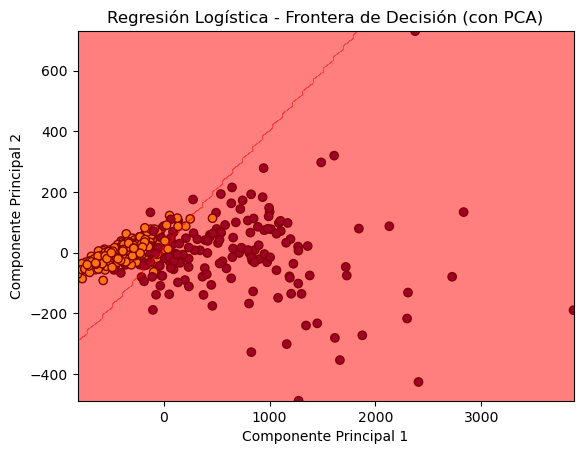

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
# Supongamos que tu DataFrame se llama 'DATABASE1'
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X = DATABASE1.drop(["Cluster",'diagnosis'], axis=1)

y = DATABASE1['diagnosis']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reducción de dimensionalidad usando PCA (reducir a 2 componentes)
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

modelo_logistico = LogisticRegression(solver='liblinear')

# Entrenar el modelo
modelo_logistico.fit(X_pca_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo_logistico.predict(X_pca_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predicciones)
confusion_matrix_result = confusion_matrix(y_test, predicciones)
classification_report_result = classification_report(y_test, predicciones)

# Imprimir resultados
print(f'Exactitud (Accuracy): {accuracy}')
print(f'Matriz de Confusión:\n{confusion_matrix_result}')
print(f'Reporte de Clasificación:\n{classification_report_result}')


# Crear una malla para graficar la frontera de decisión
xx, yy = np.meshgrid(np.linspace(X_pca_train[:, 0].min(), X_pca_train[:, 0].max(), 100),
                     np.linspace(X_pca_train[:, 1].min(), X_pca_train[:, 1].max(), 100))
Z = modelo_logistico.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los puntos y la frontera de decisión
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=y_train, cmap='viridis', edgecolors='k', marker='o')
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors='red', alpha=0.5)
plt.title('Regresión Logística - Frontera de Decisión (con PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


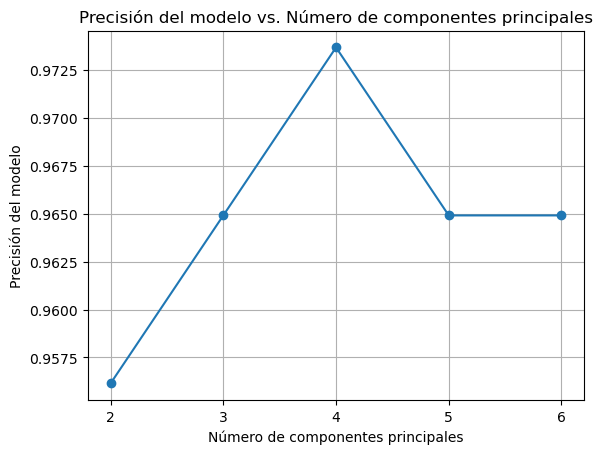

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Supongamos que tu DataFrame se llama 'DATABASE1'
X = DATABASE1.drop(["Cluster", 'diagnosis'], axis=1)
y = DATABASE1['diagnosis']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experimentar con diferentes valores de componentes principales en PCA
componentes = [2, 3, 4, 5, 6]
accuracy_scores = []

for n_componentes in componentes:
    # Reducción de dimensionalidad usando PCA
    pca = PCA(n_components=n_componentes)
    X_pca_train = pca.fit_transform(X_train)
    X_pca_test = pca.transform(X_test)

    # Crear un modelo de regresión logística
    modelo_logistico = LogisticRegression(solver='liblinear')

    # Entrenar el modelo
    modelo_logistico.fit(X_pca_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    predicciones = modelo_logistico.predict(X_pca_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, predicciones)
    accuracy_scores.append(accuracy)

# Graficar los resultados
plt.plot(componentes, accuracy_scores, marker='o')
plt.title('Precisión del modelo vs. Número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Precisión del modelo')
plt.xticks(componentes)
plt.grid(True)
plt.show()


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Supongamos que tu DataFrame se llama 'DATABASE1'
X = DATABASE1.drop(["Cluster",'diagnosis'], axis=1)
y = DATABASE1['diagnosis']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión logística
modelo_logistico = LogisticRegression(solver='liblinear')

# Entrenar el modelo
modelo_logistico.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo_logistico.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predicciones)
confusion_matrix_result = confusion_matrix(y_test, predicciones)
classification_report_result = classification_report(y_test, predicciones)

# Imprimir resultados
print(f'Exactitud (Accuracy): {accuracy}')
print(f'Matriz de Confusión:\n{confusion_matrix_result}')
print(f'Reporte de Clasificación:\n{classification_report_result}')

# Obtener los coeficientes del modelo
coeficientes = modelo_logistico.coef_[0]

# Crear un DataFrame para visualizar los coeficientes junto con el nombre de las características
coeficientes_df = pd.DataFrame({'Variable': X.columns, 'Coeficiente': coeficientes})

# Ordenar el DataFrame por valor absoluto de los coeficientes
coeficientes_df['Abs_Coeficiente'] = np.abs(coeficientes_df['Coeficiente'])
coeficientes_df = coeficientes_df.sort_values(by='Abs_Coeficiente', ascending=False)

# Mostrar el DataFrame ordenado
print(coeficientes_df)

Exactitud (Accuracy): 0.956140350877193
Matriz de Confusión:
[[39  4]
 [ 1 70]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

                   Variable  Coeficiente  Abs_Coeficiente
0               radius_mean     2.132187         2.132187
26          concavity_worst    -1.617189         1.617189
11               texture_se     1.441655         1.441655
20             radius_worst     1.229542         1.229542
25        compactness_worst    -1.207818         1.207818
28           symmetry_worst    -0.743326         0.743326
6            concavity_mean    -0.652068         0.652068
27     concave points_worst    -0.615719         0.615719
5          compactness_mean    -0.415362     

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Supongamos que tienes un DataFrame llamado 'data' con la variable 'radius_mean' y la variable de destino 'diagnosis'
# Selecciona solo la variable 'radius_mean' como tu variable independiente
X = DATABASE1[['radius_mean']]
y = DATABASE1['diagnosis']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



           radius_mean
859471           9.029
873593          21.090
859196           9.173
88466802        10.650
858970          10.170
84799002        14.540
89143602        14.410
868682          11.430
8711003         12.250
916838          19.890
861597          12.360
911157302       21.100
864729          14.870
9113778          9.667
9010877         13.400
854002          19.270
842302          17.990
925622          15.220
892214          14.260
893783          11.700
8810436         15.270
8511133         15.340
90401601        13.510
884437          10.480
861598          14.640
877500          14.450
905520          11.040
849014          19.810
90317302        10.260
8913            12.890
915691          13.400
904689          12.960
9110732         17.750
881046502       20.580
873885          15.280
90944601        13.780
857438          15.100
904969          12.340
85713702         8.196
862009          13.450
88199202        11.320
86355           22.270
884180     

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Supongamos que tienes un DataFrame llamado 'data' con la variable 'radius_mean' y la variable de destino 'diagnosis'
# Selecciona solo la variable 'radius_mean' como tu variable independiente
X = DATABASE1.drop(['radius_mean'],axis=1)
y = DATABASE1['radius_mean']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un diccionario para almacenar modelos de regresión lineal para cada variable
modelos_regresion_lineal = {}



# Iterar sobre cada variable y ajustar un modelo de regresión lineal
for variable in X_train.columns:
    modelo_regresion_lineal = LinearRegression()
    modelo_regresion_lineal.fit(X_train[[variable]], y_train)
    modelos_regresion_lineal[variable] = modelo_regresion_lineal

# Variable que deseas visualizar (cambia 'radius_mean' por la variable que desees)
variable_visualizar = 'radius_mean'

# Obtener las predicciones para la variable seleccionada
predicciones_variable = modelos_regresion_lineal[variable_visualizar].predict(X_test[[variable_visualizar]])
mse = mean_squared_error(y_test, predicciones_variable)
r2 = r2_score(y_test, predicciones_variable)

# Imprimir resultados
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
# Graficar los resultados
plt.scatter(X_test[variable_visualizar], y_test, color='black', label='Datos de prueba')
plt.scatter(X_test[variable_visualizar], predicciones_variable, color='blue', label='Predicciones')
plt.xlabel(variable_visualizar)
plt.ylabel('Área Media')
plt.legend()
plt.title(f'Datos de Prueba vs Predicciones para {variable_visualizar}')
plt.show()




KeyError: 'radius_mean'

Coeficientes del modelo:
Coeficiente: [70.86071925]


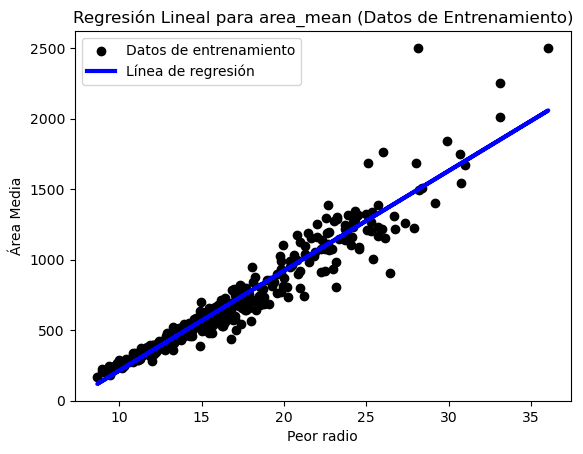

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que tu DataFrame se llama 'DATABASE1'
X = DATABASE1[['radius_worst']]
y = DATABASE1['area_mean']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
modelo_regresion_lineal = LinearRegression()

# Entrenar el modelo
modelo_regresion_lineal.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo_regresion_lineal.predict(X_test)

# Obtener los coeficientes de la regresión lineal
print('Coeficientes del modelo:')
coeficiente = modelo_regresion_lineal.coef_
print(f'Coeficiente: {coeficiente}')

# Graficar los resultados junto con la línea de regresión en los datos de entrenamiento
plt.scatter(X_train, y_train, color='black', label='Datos de entrenamiento')
plt.plot(X_train, modelo_regresion_lineal.predict(X_train), color='blue', linewidth=3, label='Línea de regresión')
plt.xlabel('Peor radio')
plt.ylabel('Área Media')
plt.legend()
plt.title('Regresión Lineal para area_mean (Datos de Entrenamiento)')
plt.show()


Mean Squared Error (MSE): 5741.648406522931
R-squared (R2): 0.9502074771211968


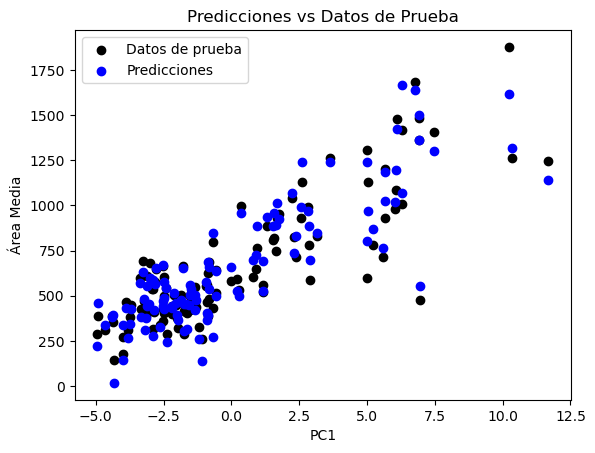

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que tu DataFrame se llama 'DATABASE1'
X = DATABASE1.drop(['area_mean','Cluster'],axis=1)  # Todas las variables excepto 'area_mean'
y = DATABASE1['area_mean']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)  # Reducir a 2 componentes para visualización
X_pca = pca.fit_transform(X_scaled)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
modelo_regresion_lineal = LinearRegression()

# Entrenar el modelo
modelo_regresion_lineal.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo_regresion_lineal.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Graficar las predicciones y los datos de prueba
plt.scatter(X_test[:, 0], y_test, color='black', label='Datos de prueba')
plt.scatter(X_test[:, 0], predicciones, color='blue', label='Predicciones')
plt.xlabel('PC1')
plt.ylabel('Área Media')
plt.legend()
plt.title('Predicciones vs Datos de Prueba')
plt.show()


In [45]:
print(DATABASE1)

           diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
842302             0       17.990         10.38          122.80     1001.0   
842517             0       20.570         17.77          132.90     1326.0   
84300903           0       19.690         21.25          130.00     1203.0   
84348301           0       11.420         20.38           77.58      386.1   
84358402           0       20.290         14.34          135.10     1297.0   
843786             0       12.450         15.70           82.57      477.1   
844359             0       18.250         19.98          119.60     1040.0   
84458202           0       13.710         20.83           90.20      577.9   
844981             0       13.000         21.82           87.50      519.8   
84501001           0       12.460         24.04           83.97      475.9   
845636             0       16.020         23.24          102.70      797.8   
84610002           0       15.780         17.89          103.60 

SI SE METE EL CLUSTER ES MAS PRECISO!

### ANALISIS DE CORRELACIONES

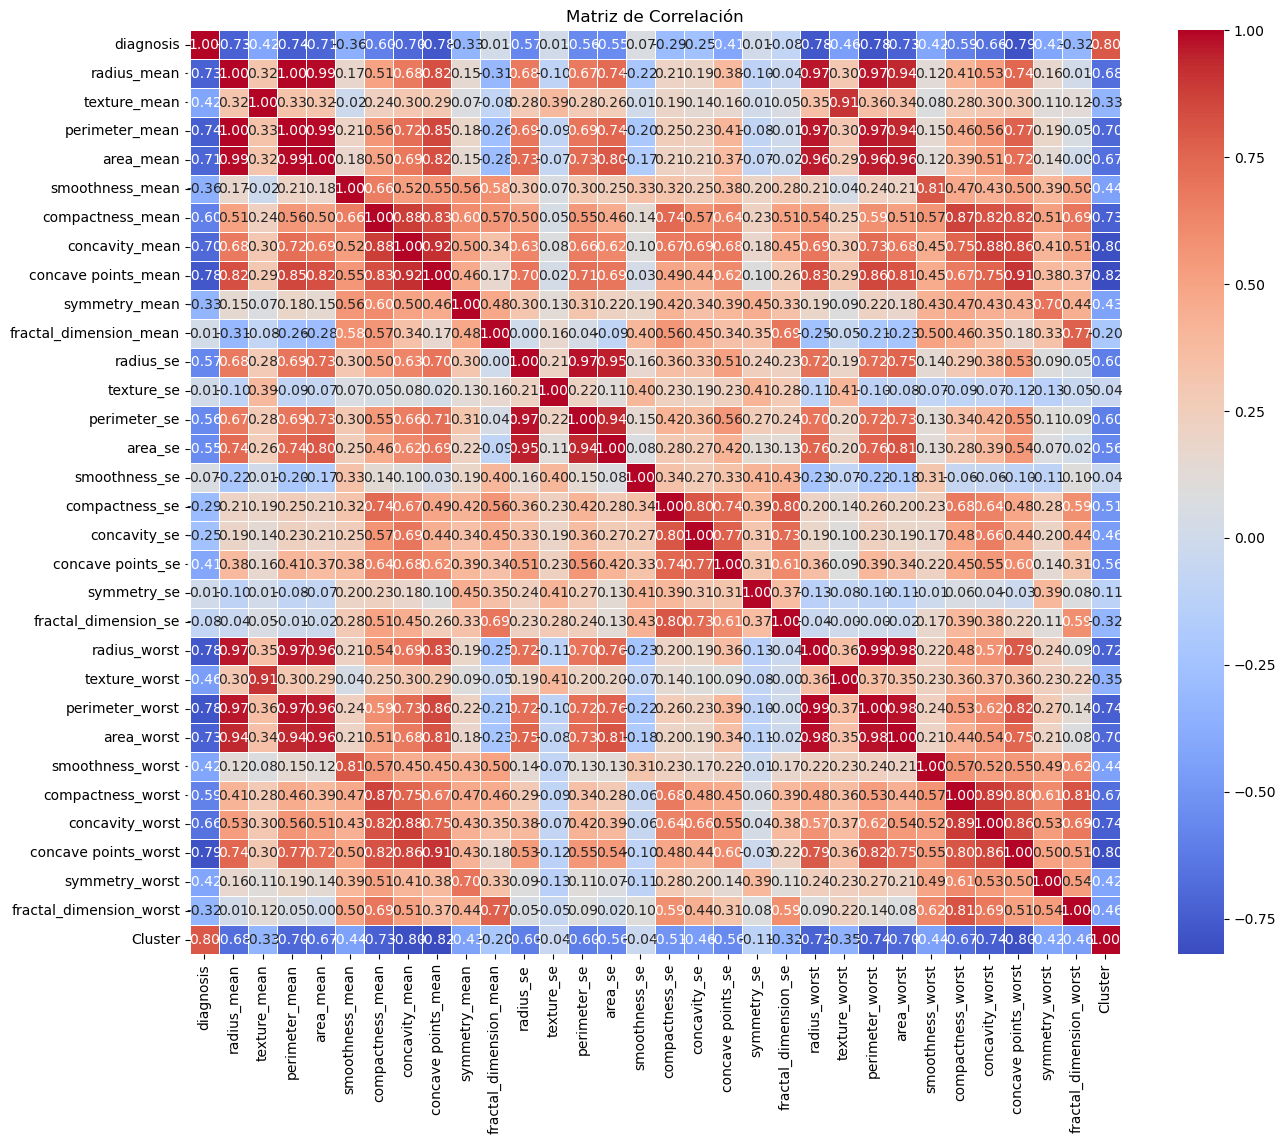

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama 'DATABASE1'
correlation_matrix = DATABASE1.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


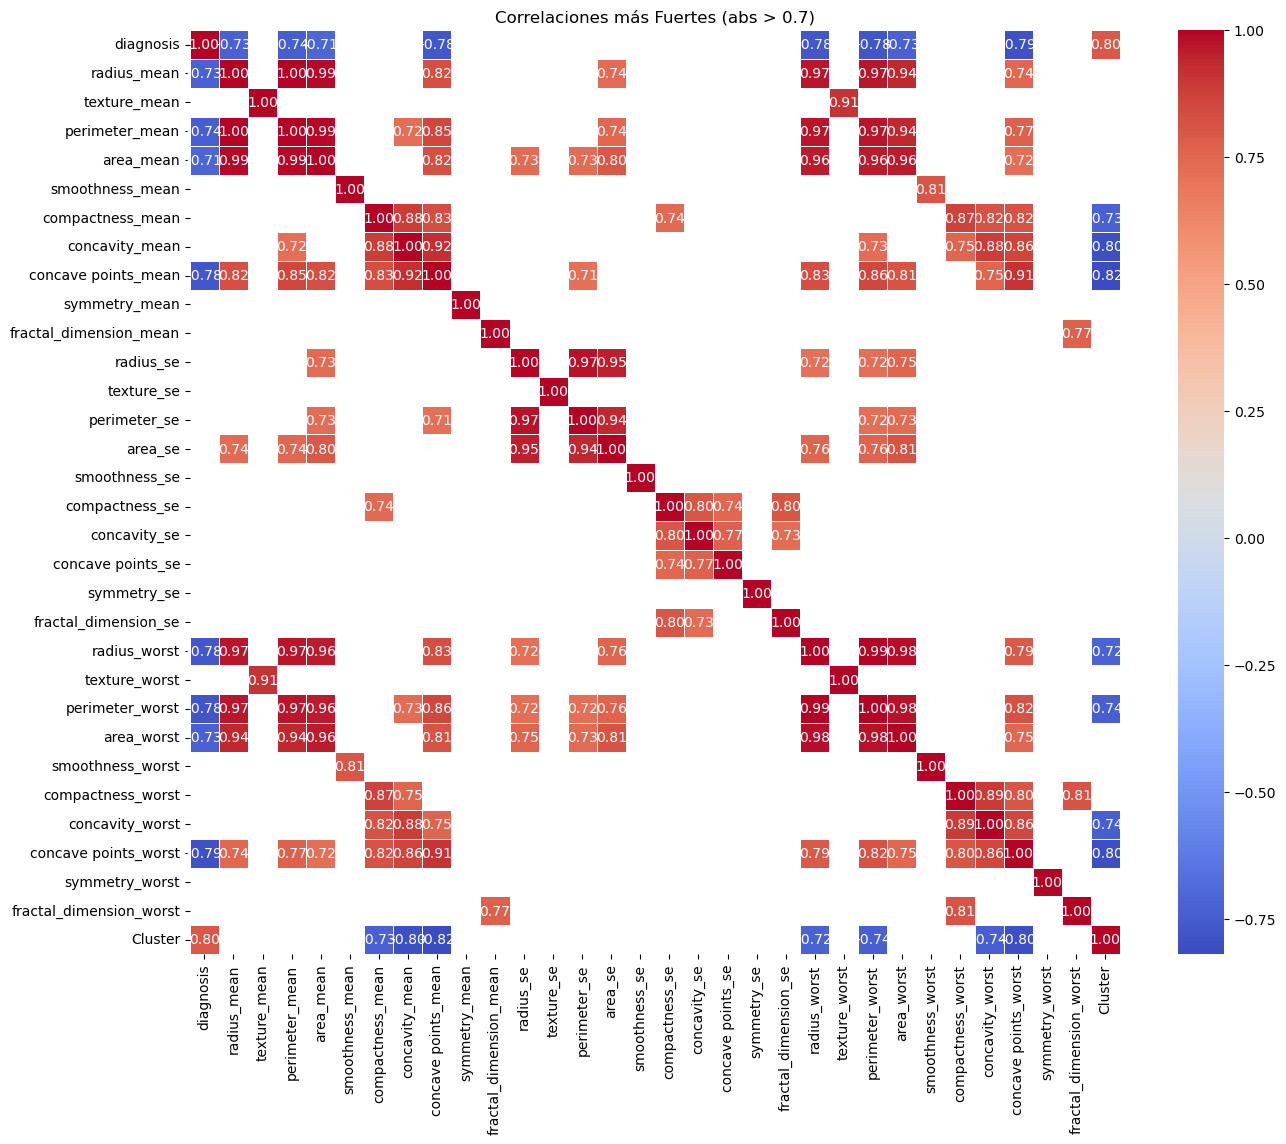

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama 'DATABASE1'
correlation_matrix = DATABASE1.corr()

# Filtrar la matriz de correlación para obtener solo las correlaciones más fuertes (por ejemplo, mayores a 0.7)
strong_correlations = correlation_matrix[abs(correlation_matrix) > 0.7]

# Crear un mapa de calor para visualizar las correlaciones más fuertes
plt.figure(figsize=(15, 12))
sns.heatmap(strong_correlations, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlaciones más Fuertes (abs > 0.7)')
plt.show()


In [32]:

correlation_with_diagnosis = DATABASE1.corr()["diagnosis"].sort_values(ascending=False)

# Imprimir las correlaciones con "diagnosis"
print(correlation_with_diagnosis)


diagnosis                  1.000000
Cluster                    0.799278
smoothness_se              0.067016
fractal_dimension_mean     0.012838
texture_se                 0.008303
symmetry_se                0.006522
fractal_dimension_se      -0.077972
concavity_se              -0.253730
compactness_se            -0.292999
fractal_dimension_worst   -0.323872
symmetry_mean             -0.330499
smoothness_mean           -0.358560
concave points_se         -0.408042
texture_mean              -0.415185
symmetry_worst            -0.416294
smoothness_worst          -0.421465
texture_worst             -0.456903
area_se                   -0.548236
perimeter_se              -0.556141
radius_se                 -0.567134
compactness_worst         -0.590998
compactness_mean          -0.596534
concavity_worst           -0.659610
concavity_mean            -0.696360
area_mean                 -0.708984
radius_mean               -0.730029
area_worst                -0.733825
perimeter_mean            -0

 La regresión logística considera la relación logarítmica de las probabilidades de pertenecer a una clase en función de las variables predictoras, mientras que la correlación lineal simplemente mide la fuerza y dirección de la relación lineal entre dos variables.

La regresión logística modela la relación entre las variables predictoras y la variable objetivo utilizando coeficientes que se ajustan para maximizar la verosimilitud. Estos coeficientes no están limitados a tener el mismo signo que la correlación lineal.

La correlación negativa indica que, en promedio, a medida que una variable aumenta, la otra tiende a disminuir. En la regresión logística, un coeficiente positivo para una variable indica que un aumento en esa variable está asociado con un aumento en la probabilidad de pertenecer a la clase positiva.

En resumen, la dirección del coeficiente en la regresión logística puede ser opuesta a la correlación lineal, y esto no es inusual. Ambos métodos proporcionan información diferente sobre la relación entre las variables y la variable objetivo.






In [33]:
!pandoc --version

"pandoc" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
